# biohansel scheme creation

Trying out a recursive approach from flat clusters defined at multiple levels from hierarchical clustering of the binary SNV matrix from a VCF file. 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# init logging level info
import logging
LOG_FORMAT = '%(asctime)s %(levelname)s: %(message)s [in %(filename)s:%(lineno)d]'
logging.basicConfig(format=LOG_FORMAT, level=logging.DEBUG)

In [4]:
from biohansel.create.clustering import HClust
from biohansel.create.subtype_node import SubtypeNode
from biohansel.create.io import newick_from_linkage, parse_vcf

/home/CSCScience.ca/pkruczkiewicz/repos/bio_hansel/.venv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
vcf_filepath = 'core-SH-1001.vcf'

In [6]:
df_nt, df_bin = parse_vcf(vcf_filepath)

In [7]:
df_bin.shape

(37727, 1002)

In [7]:
hc = HClust.from_binary_snp_matrix(df_bin, pdist_metric='euclidean', linkage_method='single')

2018-09-06 14:15:49,670 INFO: Computing distance matrix using the "euclidean" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 14:16:04,506 INFO: Computed distance matrix of size 501501 using the "euclidean" metric from binary SNV matrix of shape (37727, 1002) [in clustering.py:59]
2018-09-06 14:16:04,507 INFO: Performing hierarchical clustering of distance matrix using "single" linkage method. [in clustering.py:61]
2018-09-06 14:16:04,510 INFO: Performed hierarchical clustering using "single" linkage method to produce linkage array with dimensions (1001, 4). [in clustering.py:63]
2018-09-06 14:16:04,531 INFO: No distance thresholds specified. Using n=1294 unique distances from the distance matrix [in clustering.py:95]
2018-09-06 14:16:08,013 INFO: Defined flat clusters at N=79 non-redundant distance threshold levels. [in clustering.py:68]


In [8]:
subtype_node = SubtypeNode.from_fclusters(hc.df_clusters, df_bin, min_group_size=5, min_num_snvs=2)

2018-09-06 14:16:09,383 INFO: Initialized root SubtypeNode with distance=78.89233169326408 and N=1002 members. [in subtype_node.py:311]
2018-09-06 14:16:09,384 INFO: Building full tree of SubtypeNodes from clusters table of size (1002, 79) and minimum group size of 5 [in subtype_node.py:312]
2018-09-06 14:16:11,437 INFO: Dropping internal SubtypeNodes that do not meet minimum size requirement of 5 [in subtype_node.py:315]
2018-09-06 14:16:11,529 INFO: Filtered binary SNV matrix from N=37727 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups. [in subtype_node.py:321]
2018-09-06 14:16:11,530 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-09-06 14:16:11,719 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.89e+01 N=1002 from everything else! SNV count=0 [in subtype_node.py:

2018-09-06 14:16:18,906 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=88 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:19,086 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=60 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:19,268 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=55 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:19,442 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:19,630 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=16 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:19,790 INFO: Found 2 SNVs for differentiating SubtypeNode d=1.00e+00 N=6 from everything else [in subtype_node.py:131]
2018-09-06 14:16:19,949 INFO: Could not find

2018-09-06 14:16:27,913 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e+00 N=63 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:28,076 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=23 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:28,242 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:28,401 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:28,559 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:28,718 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 14:16:2

In [9]:
subtype_node.summary_table()

,subtype,exclusive_genomes,child_genomes,total_genomes,n_snvs,distance_level
0,None,7,995,1002,0,78.892332
1,1,806,175,981,92,34.176015
2,1.1,54,0,54,8,4.582576
3,1.2,16,0,16,2,3.741657
4,1.3,15,0,15,7,4.472136
5,1.4,12,0,12,2,3.741657
6,1.5,6,5,11,2,4.000000
7,1.5.1,5,0,5,3,3.464102
8,1.6,9,0,9,5,3.464102
9,1.7,9,0,9,13,4.795832


# Schemes from clusters derived from different methods and metrics

Combinations of different pairwise distance metrics and hierarchical clustering linkage methods may produce different schemes. In the following cell, I am looping through all possible combinations of `pdist` metrics and `linkage` methods. 

In [905]:
pdist_metrics = '''
hamming
jaccard
euclidean
'''.strip().split('\n')
linkage_methods = '''
single
average
complete
centroid
median
weighted
ward
'''.strip().split('\n')

for pdist_metric in pdist_metrics:
    for linkage_method in linkage_methods:
        print(f'\n\nHCLUST {pdist_metric} {linkage_method}\n\n')
        hc = HClust.from_binary_snp_matrix(df_bin, pdist_metric=pdist_metric, linkage_method=linkage_method)
        T = to_tree(hc.linkage_array)
        nwk = to_newick(T, df_bin.columns)
        with open(f'SH{df_bin.columns.size}-{linkage_method}-{pdist_metric}.newick', 'w') as f:
            f.write(nwk)
        print('\n\nSUBTYPE NODE\n\n')
        subtype_node = SubtypeNode.from_fclusters(hc.df_clusters, df_bin, min_group_size=5, min_num_snvs=2)
        df_glst = subtype_node.subtype_level_table(index=hc.df_clusters.index)
        df_glst.to_csv(f'SH{df_bin.columns.size}-subtype-levels-min-group-size-5-2snv-{linkage_method}-{pdist_metric}.csv')

INFO:root:Computing distance matrix using the "hamming" metric from binary SNP matrix of shape (31890, 1002).




HCLUST hamming single




INFO:root:Computed distance matrix of size 501501 using the "hamming" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "single" linkage method.
INFO:root:Performed hierarchical clustering using "single" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=36 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.19416745061147694 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 36) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.94e-01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=3.42e-02 N=981 from everything else
INFO:root:Found 41 SNVs for differentiating SubtypeNode d=2.76e-03 N=952 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.21e-04 N=816 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.70e-04 N=424 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.14e-05 N=12 from everything else! SNV count=0
INFO:root:Found 3 SNVs for differentiating SubtypeNode d=6.27e-05 N=16 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.14e-05 N=10 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.27e-05 N=7 from everything else! SNV count=0
INFO:root:Found 2 SNVs for differentiating SubtypeNode d=9.41e-05 N=7 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.27e-05 N=15 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.14e-05 N=6 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.88e-04 N=8 from everything else! SNV count=0
INFO:root:Found 5 SNVs for differentiating SubtypeNode d=2.51e-04 N=16 from everything else
INFO:root:Coul



HCLUST hamming average




INFO:root:Computed distance matrix of size 501501 using the "hamming" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "average" linkage method.
INFO:root:Performed hierarchical clustering using "average" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=57 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.8306679209783631 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 57) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.31e-01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=4.02e-02 N=981 from everything else
INFO:root:Found 8 SNVs for differentiating SubtypeNode d=2.35e-03 N=665 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.35e-03 N=270 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=9.41e-04 N=174 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for 

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=9.41e-05 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.27e-05 N=5 from everything else! SNV count=0
INFO:root:Found 12 SNVs for differentiating SubtypeNode d=8.78e-04 N=10 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.25e-04 N=5 from everything else! SNV count=0
INFO:root:Found 8 SNVs for differentiating SubtypeNode d=7.84e-04 N=17 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.14e-05 N=6 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.84e-04 N=16 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.33e-04 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=9.41e-05 N=7 from everything else! 



HCLUST hamming complete




INFO:root:Computed distance matrix of size 501501 using the "hamming" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "complete" linkage method.
INFO:root:Performed hierarchical clustering using "complete" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=67 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.8315772969582941 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 67) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.32e-01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=5.83e-02 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.89e-03 N=737 from everything else! SNV count=0
INFO:root:Found 5 SNVs for differentiating SubtypeNode d=2.29e-03 N=316 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.44e-03 N=82 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for d

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.14e-05 N=9 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.14e-05 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.21e-04 N=37 from everything else! SNV count=0
INFO:root:Found 2 SNVs for differentiating SubtypeNode d=5.64e-04 N=29 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.20e-04 N=12 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.88e-04 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.21e-04 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.88e-04 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e-03 



HCLUST hamming centroid




INFO:root:Computed distance matrix of size 501501 using the "hamming" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "centroid" linkage method.
INFO:root:Performed hierarchical clustering using "centroid" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=54 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.830511132016306 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 54) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.31e-01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=4.01e-02 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.98e-03 N=680 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.44e-03 N=470 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.29e-03 N=384 from everything else! SNV count=0
INFO:root:Coul

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.14e-05 N=9 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.88e-04 N=23 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=9.41e-05 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=9.41e-05 N=7 from everything else! SNV count=0
INFO:root:Found 8 SNVs for differentiating SubtypeNode d=7.21e-04 N=17 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.27e-05 N=7 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.21e-04 N=16 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.02e-04 N=9 from everything else! SNV count=0
INFO:root:Found 12 SNVs for differentiating SubtypeNode d=8.15e-04 N=10 from eve



HCLUST hamming median




INFO:root:Computed distance matrix of size 501501 using the "hamming" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "median" linkage method.
INFO:root:Performed hierarchical clustering using "median" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=52 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.8170272812793978 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 52) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.17e-01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=4.44e-02 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.48e-03 N=737 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.54e-03 N=449 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.03e-03 N=288 from everything else! SNV count=0
INFO:root:Coul

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.88e-04 N=14 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.25e-04 N=6 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.25e-04 N=11 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.88e-04 N=21 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.25e-04 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.27e-05 N=5 from everything else! SNV count=0
INFO:root:Found 3 SNVs for differentiating SubtypeNode d=5.33e-04 N=37 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.20e-04 N=31 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.88e-0



HCLUST hamming weighted




INFO:root:Computed distance matrix of size 501501 using the "hamming" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "weighted" linkage method.
INFO:root:Performed hierarchical clustering using "weighted" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=60 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.8171213546566322 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 60) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.17e-01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=4.44e-02 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.10e-03 N=737 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.72e-03 N=270 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.22e-03 N=247 from everything else! SNV count=0
INFO:root:Coul

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.51e-04 N=7 from everything else! SNV count=0
INFO:root:Found 10 SNVs for differentiating SubtypeNode d=8.47e-04 N=11 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.96e-04 N=88 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.70e-04 N=53 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.45e-04 N=25 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.51e-04 N=19 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.20e-04 N=14 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.57e-04 N=9 from everything else! SNV count=0
INFO:root:Found 4 SNVs for differentiating SubtypeNode d=3.45e-04 N=13 from 



HCLUST hamming ward




INFO:root:Computed distance matrix of size 501501 using the "hamming" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "ward" linkage method.
INFO:root:Performed hierarchical clustering using "ward" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=95 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.8316086547507054 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 95) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.32e-01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=1.59e-01 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.71e-03 N=144 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.17e-03 N=60 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.07e-03 N=30 from everything else! SNV count=0
INFO:root:Could 

INFO:root:Found 5 SNVs for differentiating SubtypeNode d=3.64e-03 N=125 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.16e-03 N=46 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.27e-04 N=29 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.70e-04 N=22 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.08e-04 N=16 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.88e-04 N=6 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.27e-05 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.16e-03 N=15 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.21e



HCLUST jaccard single




INFO:root:Computed distance matrix of size 501501 using the "jaccard" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "single" linkage method.
INFO:root:Performed hierarchical clustering using "single" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=4363 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=279 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.9999622641509434 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 279) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=1002 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.78e-01 N=985 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.95e-01 N=898 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.36e-01 N=893 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.89e-01 N=630 from everything else! 

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.41e-02 N=9 from everything else! SNV count=0
INFO:root:Found 4 SNVs for differentiating SubtypeNode d=4.49e-02 N=13 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.10e-02 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.62e-02 N=27 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.23e-02 N=19 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.22e-02 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.22e-02 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.10e-01 N=8 from everything else! SNV count=0
INFO:root:Found 6 SNVs for differentiating SubtypeNode d=7.94e-02 N=10 from ever



HCLUST jaccard average




INFO:root:Computed distance matrix of size 501501 using the "jaccard" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "average" linkage method.
INFO:root:Performed hierarchical clustering using "average" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=4363 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=333 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.9999622641509434 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 333) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=1002 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.07e-01 N=895 from everything else! SNV count=0
INFO:root:Found 5 SNVs for differentiating SubtypeNode d=4.68e-01 N=316 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.47e-01 N=181 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.89e-01 N=87 from everything else! SNV count=0
INFO:root:Could 

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.62e-02 N=11 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.06e-02 N=31 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.08e-02 N=26 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.86e-02 N=21 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.45e-02 N=10 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.32e-01 N=27 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.45e-02 N=21 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.14e-02 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differen



HCLUST jaccard complete




INFO:root:Computed distance matrix of size 501501 using the "jaccard" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "complete" linkage method.
INFO:root:Performed hierarchical clustering using "complete" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=4363 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=369 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.9999622641509434 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 369) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=1002 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=9.74e-01 N=921 from everything else! SNV count=0
INFO:root:Found 8 SNVs for differentiating SubtypeNode d=7.32e-01 N=665 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.96e-01 N=149 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.93e-01 N=52 from everything else! SNV count=0
INFO:root:Could 

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.17e-02 N=9 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.26e-01 N=34 from everything else! SNV count=0
INFO:root:Found 2 SNVs for differentiating SubtypeNode d=1.88e-01 N=29 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.57e-02 N=13 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.35e-02 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.57e-02 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.06e-02 N=5 from everything else! SNV count=0
INFO:root:Found 6 SNVs for differentiating SubtypeNode d=1.47e-01 N=10 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.47e-01 N=7 from everything else! 



HCLUST jaccard centroid




INFO:root:Computed distance matrix of size 501501 using the "jaccard" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "centroid" linkage method.
INFO:root:Performed hierarchical clustering using "centroid" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=4363 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=319 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.8934681181959565 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 319) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.93e-01 N=1002 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.92e-01 N=997 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.67e-01 N=979 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.28e-01 N=895 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.69e-01 N=488 from everything else! 

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.45e-02 N=16 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.06e-02 N=11 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.76e-02 N=6 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.55e-02 N=11 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.21e-02 N=29 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.55e-02 N=24 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.64e-02 N=18 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.10e-02 N=7 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for different



HCLUST jaccard median




INFO:root:Computed distance matrix of size 501501 using the "jaccard" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "median" linkage method.
INFO:root:Performed hierarchical clustering using "median" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=4363 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=303 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.8362068965517241 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 303) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.36e-01 N=1002 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.19e-01 N=977 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.96e-01 N=893 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.74e-01 N=270 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.10e-01 N=247 from everything else! 

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.29e-01 N=36 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.95e-02 N=31 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.45e-02 N=26 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.72e-02 N=12 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.10e-02 N=7 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.72e-02 N=9 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.59e-02 N=25 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.33e-02 N=7 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differenti



HCLUST jaccard weighted




INFO:root:Computed distance matrix of size 501501 using the "jaccard" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "weighted" linkage method.
INFO:root:Performed hierarchical clustering using "weighted" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=4363 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=343 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=0.9999622641509434 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 343) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=1002 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.50e-01 N=898 from everything else! SNV count=0
INFO:root:Found 8 SNVs for differentiating SubtypeNode d=6.17e-01 N=665 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.73e-01 N=270 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.96e-01 N=60 from everything else! SNV count=0
INFO:root:Could 

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e-01 N=27 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.94e-02 N=12 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.86e-02 N=7 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.00e-02 N=7 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e-01 N=12 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.03e-01 N=6 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.10e-01 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.06e-02 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiat



HCLUST jaccard ward




INFO:root:Computed distance matrix of size 501501 using the "jaccard" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "ward" linkage method.
INFO:root:Performed hierarchical clustering using "ward" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=4363 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=350 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=1.0 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 350) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=1002 from everything else! SNV count=0
INFO:root:Found 5 SNVs for differentiating SubtypeNode d=1.00e+00 N=125 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.85e-01 N=46 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.14e-01 N=25 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.49e-01 N=19 from everything else! SNV count=0
INFO:root:Could no

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.30e-01 N=5 from everything else! SNV count=0
INFO:root:Found 6 SNVs for differentiating SubtypeNode d=5.89e-01 N=6 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.52e-01 N=6 from everything else! SNV count=0
INFO:root:Found 3 SNVs for differentiating SubtypeNode d=2.69e-01 N=8 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=38 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.45e-01 N=12 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.03e-01 N=5 from everything else! SNV count=0
INFO:root:Found 7 SNVs for differentiating SubtypeNode d=5.45e-01 N=6 from everything else
INFO:root:Found 3 SNVs for differentiating SubtypeNode d=2.53e-01 N=5 from everything else
INFO:root:Could not find enough SNVs for dif



HCLUST euclidean single




INFO:root:Computed distance matrix of size 501501 using the "euclidean" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "single" linkage method.
INFO:root:Performed hierarchical clustering using "single" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=36 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=78.689262291624 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 36) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.87e+01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=3.30e+01 N=981 from everything else
INFO:root:Found 41 SNVs for differentiating SubtypeNode d=9.38e+00 N=952 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.80e+00 N=816 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=424 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=12 from everything else! SNV count=0
INFO:root:Found 3 SNVs for differentiating SubtypeNode d=1.41e+00 N=16 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=10 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=7 from everything else! SNV count=0
INFO:root:Found 2 SNVs for differentiating SubtypeNode d=1.73e+00 N=7 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=15 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=6 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=8 from everything else! SNV count=0
INFO:root:Found 5 SNVs for differentiating SubtypeNode d=2.83e+00 N=16 from everything else
INFO:root:Coul



HCLUST euclidean average




INFO:root:Computed distance matrix of size 501501 using the "euclidean" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "average" linkage method.
INFO:root:Performed hierarchical clustering using "average" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=56 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=162.75748830699004 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 56) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.63e+02 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=3.58e+01 N=981 from everything else
INFO:root:Found 8 SNVs for differentiating SubtypeNode d=8.66e+00 N=665 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.56e+00 N=270 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.48e+00 N=174 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for 

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.46e+00 N=27 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=20 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=5 from everything else! SNV count=0
INFO:root:Found 12 SNVs for differentiating SubtypeNode d=5.29e+00 N=10 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=5 from everything else! SNV count=0
INFO:root:Found 8 SNVs for differentiating SubtypeNode d=5.00e+00 N=17 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=6 from everything else!



HCLUST euclidean complete




INFO:root:Computed distance matrix of size 501501 using the "euclidean" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "complete" linkage method.
INFO:root:Performed hierarchical clustering using "complete" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=67 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=162.84655354044187 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 67) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.63e+02 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=4.31e+01 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.11e+01 N=737 from everything else! SNV count=0
INFO:root:Found 5 SNVs for differentiating SubtypeNode d=8.54e+00 N=316 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.78e+00 N=82 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for d

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=9 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.80e+00 N=37 from everything else! SNV count=0
INFO:root:Found 2 SNVs for differentiating SubtypeNode d=4.24e+00 N=29 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.65e+00 N=12 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.80e+00 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.71e+00 



HCLUST euclidean centroid




INFO:root:Computed distance matrix of size 501501 using the "euclidean" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "centroid" linkage method.
INFO:root:Performed hierarchical clustering using "centroid" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=45 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=162.46538092775333 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 45) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.62e+02 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=3.52e+01 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.00e+00 N=950 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.00e+00 N=503 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.74e+00 N=497 from everything else! SNV count=0
INFO:root:Coul

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=27 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=21 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.61e+00 N=8 from everything else! SNV count=0
INFO:root:Found 9 SNVs for differentiating SubtypeNode d=3.61e+00 N=5 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=8 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=5 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N



HCLUST euclidean median




INFO:root:Computed distance matrix of size 501501 using the "euclidean" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "median" linkage method.
INFO:root:Performed hierarchical clustering using "median" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=44 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=78.689262291624 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 44) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.87e+01 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=3.56e+01 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.68e+00 N=950 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.74e+00 N=512 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=5.39e+00 N=331 from everything else! SNV count=0
INFO:root:Coul

INFO:root:Found 4 SNVs for differentiating SubtypeNode d=2.83e+00 N=13 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=27 from everything else! SNV count=1
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=21 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=8 from everything else! SNV count=0
INFO:root:Found 6 SNVs for differentiating SubtypeNode d=2.83e+00 N=10 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=7 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=8 from everything else! 



HCLUST euclidean weighted




INFO:root:Computed distance matrix of size 501501 using the "euclidean" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "weighted" linkage method.
INFO:root:Performed hierarchical clustering using "weighted" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=63 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=161.4249051416788 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 63) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.61e+02 N=1002 from everything else! SNV count=0
INFO:root:Found 92 SNVs for differentiating SubtypeNode d=3.76e+01 N=981 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=9.90e+00 N=737 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.42e+00 N=270 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.24e+00 N=247 from everything else! SNV count=0
INFO:root:Coul

INFO:root:Found 10 SNVs for differentiating SubtypeNode d=5.10e+00 N=11 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.36e+00 N=88 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.61e+00 N=41 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=24 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=19 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.65e+00 N=14 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=9 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=11 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.61



HCLUST euclidean ward




INFO:root:Computed distance matrix of size 501501 using the "euclidean" metric from binary SNP matrix of shape (31890, 1002)
INFO:root:Performing hierarchical clustering of distance matrix using "ward" linkage method.
INFO:root:Performed hierarchical clustering using "ward" linkage method to produce linkage array with dimensions (1001, 4).
INFO:root:No distance thresholds specified. Using n=849 unique distances from the distance matrix
INFO:root:Defined flat clusters at N=103 non-redundant distance threshold levels.
INFO:root:Initialized root SubtypeNode with distance=162.84962388657826 and N=1002 members.
INFO:root:Building full tree of SubtypeNodes from clusters table of size (1002, 103) and minimum group size of 5




SUBTYPE NODE




INFO:root:Dropping internal SubtypeNodes that do not meet minimum size requirement of 5
INFO:root:Filtered binary SNV matrix from N=31890 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups.
INFO:root:Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002)
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.63e+02 N=1002 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.87e+01 N=589 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.50e+01 N=66 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.23e+01 N=34 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=8.72e+00 N=16 from everything else! SNV

INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.00e+00 N=5 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=6.78e+00 N=6 from everything else! SNV count=0
INFO:root:Found 32 SNVs for differentiating SubtypeNode d=1.50e+01 N=9 from everything else
INFO:root:Found 9 SNVs for differentiating SubtypeNode d=1.50e+01 N=7 from everything else
INFO:root:Found 18 SNVs for differentiating SubtypeNode d=7.87e+01 N=215 from everything else
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=1.50e+01 N=79 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=7.62e+00 N=35 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=4.69e+00 N=14 from everything else! SNV count=0
INFO:root:Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=6 from everything else! SNV count=0
INFO:root:Co

In [11]:
from multiprocessing import Pool

In [22]:
pool = Pool(12)

2018-09-06 15:08:03,561 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 15:08:04,290 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 15:08:05,036 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 15:08:05,888 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 15:08:06,773 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 15:08:07,923 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 15:08:09,019 INFO: Computing distance matrix using the "jaccard" metric from 

2018-09-06 15:08:43,341 INFO: Initialized root SubtypeNode with distance=0.7021761603095926 and N=1002 members. [in subtype_node.py:311]
2018-09-06 15:08:43,358 INFO: Building full tree of SubtypeNodes from clusters table of size (1002, 97) and minimum group size of 5 [in subtype_node.py:312]
2018-09-06 15:08:43,418 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.52e-03 N=946 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:43,697 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.86e-03 N=941 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:43,931 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.40e-03 N=936 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:44,133 INFO: Defined flat clusters at N=141 non-redundant distance threshold levels. [in clustering.py:68]
2018-09-06 15:08:44,164 INFO: Could not find enough SNVs for differentiating SubtypeNod

2018-09-06 15:08:50,171 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.86e-04 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:50,186 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.98e-04 N=25 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:50,188 INFO: Filtered binary SNV matrix from N=37727 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups. [in subtype_node.py:321]
2018-09-06 15:08:50,234 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-09-06 15:08:50,313 INFO: Dropping internal SubtypeNodes that do not meet minimum size requirement of 5 [in subtype_node.py:315]
2018-09-06 15:08:50,411 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=5 from everything else! 

2018-09-06 15:08:53,201 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.06e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:53,288 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-04 N=44 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:53,305 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:53,423 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.25e-03 N=447 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:53,446 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.77e-04 N=112 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:53,569 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.98e-04 N=37 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08

2018-09-06 15:08:56,297 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:56,313 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e-04 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:56,357 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:56,385 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.67e-03 N=64 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:56,518 INFO: Found 3 SNVs for differentiating SubtypeNode d=2.12e-04 N=5 from everything else [in subtype_node.py:131]
2018-09-06 15:08:56,546 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.45e-04 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:56,595 INFO: Could not find en

2018-09-06 15:08:59,268 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.39e-04 N=38 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:59,362 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.25e-03 N=16 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:59,377 INFO: Found 6 SNVs for differentiating SubtypeNode d=4.51e-04 N=8 from everything else [in subtype_node.py:131]
2018-09-06 15:08:59,374 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:59,427 INFO: Found 6 SNVs for differentiating SubtypeNode d=7.95e-04 N=60 from everything else [in subtype_node.py:131]
2018-09-06 15:08:59,586 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=32 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:08:59,647 INFO: Could not find enough SNVs for differentia

2018-09-06 15:09:02,286 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.71e-04 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:02,326 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.39e-04 N=91 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:02,348 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-04 N=63 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:02,438 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:02,524 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:02,631 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.86e-04 N=80 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:0

2018-09-06 15:09:05,292 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.63e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:05,322 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.77e-04 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:05,355 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:05,482 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.92e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:05,502 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:05,580 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.36e-04 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:05

2018-09-06 15:09:08,260 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=59 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:08,298 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.92e-04 N=91 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:08,446 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:08,433 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-09-06 15:09:08,515 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.06e-04 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:08,509 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-04 N=49 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:0

2018-09-06 15:09:11,234 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.86e-04 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:11,246 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.83e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:11,302 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.71e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:11,369 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.64e-03 N=167 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:11,431 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.06e-04 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:11,549 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.06e-03 N=18 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:

2018-09-06 15:09:14,241 INFO: Could not find enough SNVs for differentiating SubtypeNode d=9.01e-04 N=141 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:14,261 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.71e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:14,284 INFO: Found 8 SNVs for differentiating SubtypeNode d=5.57e-04 N=54 from everything else [in subtype_node.py:131]
2018-09-06 15:09:14,283 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=8 from everything else! SNV count=1 [in subtype_node.py:135]
2018-09-06 15:09:14,308 INFO: Dropping internal SubtypeNodes that do not meet minimum size requirement of 5 [in subtype_node.py:315]
2018-09-06 15:09:14,463 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.86e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:14,474 INFO: Filtered binary SNV matrix from N=37727 rows t

2018-09-06 15:09:16,744 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-04 N=129 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:16,810 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.16e-04 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:16,871 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.31e-03 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:16,955 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:16,970 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.34e-03 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:17,018 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e-04 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09

2018-09-06 15:09:19,350 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.06e-04 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:19,742 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=63 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:19,794 INFO: Computing distance matrix using the "euclidean" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 15:09:19,854 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.39e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:19,899 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:19,934 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.77e-04 N=19 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:19,999 INFO

2018-09-06 15:09:22,883 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:22,858 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.46e-03 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:22,946 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.04e-04 N=29 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:23,039 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.18e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:23,056 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=17 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:23,141 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:23

2018-09-06 15:09:26,002 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=18 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:26,121 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:26,121 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e-04 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:26,259 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:26,279 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.39e-04 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:26,304 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:26

2018-09-06 15:09:29,516 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.02e-03 N=176 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:29,585 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-05 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:29,632 INFO: Found 10 SNVs for differentiating SubtypeNode d=5.30e-04 N=6 from everything else [in subtype_node.py:131]
2018-09-06 15:09:29,647 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.18e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:29,735 INFO: Found 433 SNVs for differentiating SubtypeNode d=3.44e-02 N=8 from everything else [in subtype_node.py:131]
2018-09-06 15:09:29,784 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.95e-03 N=171 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:29,911 INFO: Found 10 SNVs for differentiating Subt

2018-09-06 15:09:33,453 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.98e-04 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:33,667 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:33,743 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:33,938 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.33e-03 N=33 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:34,056 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e-04 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:34,716 INFO: Computing distance matrix using the "euclidean" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-09-06 15:09:34,883 INFO:

2018-09-06 15:09:39,784 INFO: Dropping SubtypeNodes that do not contain enough SNVs [in subtype_node.py:327]
2018-09-06 15:09:39,798 INFO: Pass 1: Dropped 52 SNV-less nodes [in subtype_node.py:149]
2018-09-06 15:09:39,826 INFO: Pass 2: Dropped 11 SNV-less nodes [in subtype_node.py:149]
2018-09-06 15:09:39,846 INFO: Found 10 SNVs for differentiating SubtypeNode d=1.22e-03 N=6 from everything else [in subtype_node.py:131]
2018-09-06 15:09:39,846 INFO: Pass 3: Dropped 2 SNV-less nodes [in subtype_node.py:149]
2018-09-06 15:09:39,883 INFO: Sorting all children for all SubtypeNodes by size from largest to smallest [in subtype_node.py:329]
2018-09-06 15:09:39,915 INFO: Assigning hierarchical subtype designations for all SubtypeNodes [in subtype_node.py:331]
2018-09-06 15:09:40,109 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.22e-03 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:40,412 INFO: Found 46 SNVs for differentiating SubtypeNode

2018-09-06 15:09:50,261 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.31e-03 N=78 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:50,498 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.36e-04 N=31 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:50,748 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.71e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:50,998 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.71e-04 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-09-06 15:09:51,245 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:51,492 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.77e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:09:51,

2018-09-06 15:09:59,353 INFO: Found 92 SNVs for differentiating SubtypeNode d=3.42e+01 N=981 from everything else [in subtype_node.py:131]
2018-09-06 15:09:59,368 INFO: Assigning hierarchical subtype designations for all SubtypeNodes [in subtype_node.py:331]
2018-09-06 15:09:59,479 INFO: Computed distance matrix of size 501501 using the "euclidean" metric from binary SNV matrix of shape (37727, 1002) [in clustering.py:59]
2018-09-06 15:09:59,494 INFO: Performing hierarchical clustering of distance matrix using "centroid" linkage method. [in clustering.py:61]
2018-09-06 15:09:59,530 INFO: Performed hierarchical clustering using "centroid" linkage method to produce linkage array with dimensions (1001, 4). [in clustering.py:63]
2018-09-06 15:09:59,584 INFO: No distance thresholds specified. Using n=1294 unique distances from the distance matrix [in clustering.py:95]
2018-09-06 15:09:59,633 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.09e+01 N=956 from everything el

2018-09-06 15:10:07,759 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.00e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:07,971 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.46e+00 N=59 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:08,185 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=49 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:08,430 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=23 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:08,678 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:08,939 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:0

2018-09-06 15:10:13,052 INFO: Found 3 SNVs for differentiating SubtypeNode d=2.83e+00 N=5 from everything else [in subtype_node.py:131]
2018-09-06 15:10:13,146 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.40e+00 N=855 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:13,267 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.48e+00 N=94 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:13,281 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.00e+00 N=472 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:13,289 INFO: Found 2 SNVs for differentiating SubtypeNode d=4.00e+00 N=11 from everything else [in subtype_node.py:131]
2018-09-06 15:10:13,468 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.48e+00 N=455 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:13,519 INFO: Could not find enough SNVs for differe

2018-09-06 15:10:16,453 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.00e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:16,595 INFO: Found 92 SNVs for differentiating SubtypeNode d=3.58e+01 N=981 from everything else [in subtype_node.py:131]
2018-09-06 15:10:16,645 INFO: Defined flat clusters at N=563 non-redundant distance threshold levels. [in clustering.py:68]
2018-09-06 15:10:16,690 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:16,694 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.63e+02 N=1002 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:16,709 INFO: Initialized root SubtypeNode with distance=0.9999622641509434 and N=1002 members. [in subtype_node.py:311]
2018-09-06 15:10:16,703 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=5 fro

2018-09-06 15:10:18,846 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e+00 N=80 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:18,861 INFO: Found 4 SNVs for differentiating SubtypeNode d=2.83e+00 N=5 from everything else [in subtype_node.py:131]
2018-09-06 15:10:18,951 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.57e+00 N=411 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:19,041 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:19,054 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:19,110 INFO: Found 5 SNVs for differentiating SubtypeNode d=3.74e+00 N=9 from everything else [in subtype_node.py:131]
2018-09-06 15:10:19,116 INFO: Could not find enough SNVs for differentiat

2018-09-06 15:10:21,334 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:21,341 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:21,459 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.00e+00 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:21,510 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.74e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:21,489 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.86e+00 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:21,618 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.00e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:21,

2018-09-06 15:10:24,196 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=20 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:24,187 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=23 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:24,198 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=25 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:24,281 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=18 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:24,298 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:24,458 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:

2018-09-06 15:10:26,777 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:26,828 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:26,896 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.69e+00 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:26,936 INFO: Found 2 SNVs for differentiating SubtypeNode d=3.74e+00 N=12 from everything else [in subtype_node.py:131]
2018-09-06 15:10:26,966 INFO: Found 9 SNVs for differentiating SubtypeNode d=6.48e+00 N=19 from everything else [in subtype_node.py:131]
2018-09-06 15:10:27,100 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:27,098 INFO: Could not find enough SNVs for differentiat

2018-09-06 15:10:29,427 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:29,499 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.57e+00 N=29 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:29,570 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=49 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:29,570 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:29,652 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:29,691 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=25 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:

2018-09-06 15:10:32,102 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.11e+01 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:32,184 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.00e+00 N=140 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:32,290 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=30 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:32,315 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.00e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:32,335 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:32,383 INFO: Found 433 SNVs for differentiating SubtypeNode d=3.42e+01 N=8 from everything else [in subtype_node.py:131]
2018-09-06 15:10:32,471 INFO: Could not fin

2018-09-06 15:10:34,918 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:34,921 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.74e+00 N=91 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:34,953 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:35,092 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:35,143 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.46e+00 N=68 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:35,151 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.00e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:35,

2018-09-06 15:10:37,947 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.00e+00 N=130 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:37,953 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:38,142 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:38,136 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.74e+00 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:38,165 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=123 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:38,199 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:1

2018-09-06 15:10:41,011 INFO: Found 3 SNVs for differentiating SubtypeNode d=5.00e+00 N=9 from everything else [in subtype_node.py:131]
2018-09-06 15:10:41,035 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:41,138 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-09-06 15:10:41,232 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=49 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:41,253 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.12e+00 N=17 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:41,320 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.36e+00 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:41,363 INFO: Could not find e

2018-09-06 15:10:44,189 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.93e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:44,255 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.58e+00 N=49 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:44,363 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:44,388 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:44,437 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.16e+00 N=18 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:44,468 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e+00 N=25 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:

2018-09-06 15:10:47,227 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:47,363 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.00e+00 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:47,416 INFO: Found 433 SNVs for differentiating SubtypeNode d=3.60e+01 N=8 from everything else [in subtype_node.py:131]
2018-09-06 15:10:47,457 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:47,589 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:47,616 INFO: Found 712 SNVs for differentiating SubtypeNode d=3.80e+01 N=6 from everything else [in subtype_node.py:131]
2018-09-06 15:10:47,618 INFO: Dropping SubtypeNodes that do not contai

2018-09-06 15:10:57,155 INFO: Found 3 SNVs for differentiating SubtypeNode d=1.33e+01 N=33 from everything else [in subtype_node.py:131]
2018-09-06 15:10:57,338 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.75e+00 N=17 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:57,511 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.56e+00 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:57,681 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:57,864 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:58,027 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e+01 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:10:58,194 INFO: Could not find

2018-09-06 15:11:04,677 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.83e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:04,791 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.71e-01 N=476 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:04,854 INFO: Found 7 SNVs for differentiating SubtypeNode d=1.36e+01 N=15 from everything else [in subtype_node.py:131]
2018-09-06 15:11:04,988 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.40e-01 N=424 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:05,029 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.10e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:05,174 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.94e-01 N=419 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:05,210 INFO: Could not fi

2018-09-06 15:11:07,722 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.52e-01 N=977 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:07,787 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:07,875 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.48e-01 N=218 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:07,921 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.65e-01 N=968 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:07,926 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-02 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:07,985 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:1

2018-09-06 15:11:10,343 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.57e-01 N=97 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:10,353 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.18e+01 N=47 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:10,439 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.61e-02 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:10,488 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.87e-02 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:10,568 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.26e-01 N=64 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:10,579 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.11e+01 N=34 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:1

2018-09-06 15:11:12,975 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.76e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:12,978 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.62e-02 N=18 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:13,107 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.75e-01 N=119 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:13,148 INFO: Found 18 SNVs for differentiating SubtypeNode d=7.89e+01 N=215 from everything else [in subtype_node.py:131]
2018-09-06 15:11:13,164 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.99e-01 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:13,171 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.57e-02 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:13,299 INFO: Could not f

2018-09-06 15:11:15,273 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.91e-01 N=93 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:15,277 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:15,294 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.01e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:15,339 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.62e-02 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:15,421 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.45e-01 N=461 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:15,457 INFO: Found 5 SNVs for differentiating SubtypeNode d=3.46e-01 N=67 from everything else [in subtype_node.py:131]
2018-09-06 15:11:15,510 INFO: Could not find

2018-09-06 15:11:17,387 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.24e+00 N=24 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:17,533 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.81e-02 N=32 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:17,564 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.23e-02 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:17,568 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.29e+00 N=16 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:17,595 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.27e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:17,607 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.06e-01 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:1

2018-09-06 15:11:19,527 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.76e-02 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:19,585 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.00e+00 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:19,640 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.38e-01 N=107 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:19,658 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.12e-01 N=92 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:19,677 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.84e-01 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:19,714 INFO: Found 20 SNVs for differentiating SubtypeNode d=5.17e-01 N=46 from everything else [in subtype_node.py:131]
2018-09-06 15:11:19,824 INFO: Could not fi

2018-09-06 15:11:21,717 INFO: Found 2 SNVs for differentiating SubtypeNode d=1.33e-01 N=25 from everything else [in subtype_node.py:131]
2018-09-06 15:11:21,737 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.67e-01 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:21,737 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.20e-02 N=9 from everything else! SNV count=1 [in subtype_node.py:135]
2018-09-06 15:11:21,764 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.16e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:21,886 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.13e-01 N=104 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:21,927 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.81e-02 N=32 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:21,951 INFO: Could not find

2018-09-06 15:11:23,869 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.57e-01 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:23,882 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.17e-02 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:23,971 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.09e-01 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-09-06 15:11:23,989 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.38e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:24,002 INFO: Found 712 SNVs for differentiating SubtypeNode d=7.49e+01 N=6 from everything else [in subtype_node.py:131]
2018-09-06 15:11:24,006 INFO: Dropping SubtypeNodes that do not contain enough SNVs [in subtype_node.py:327]
2018-09-06 15:11:24,012 INFO: Pass 1: Dropped 46 SNV-less nodes [in subtype_node.py:149]
2018-09-06 1

2018-09-06 15:11:26,034 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.70e-02 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:26,036 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.37e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:26,087 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.23e-01 N=62 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:26,208 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.08e-01 N=61 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:26,222 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.08e-02 N=16 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:26,223 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.23e-02 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:26

2018-09-06 15:11:28,026 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.21e-01 N=20 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:28,106 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.37e-02 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-09-06 15:11:28,115 INFO: Found 2 SNVs for differentiating SubtypeNode d=2.57e-01 N=51 from everything else [in subtype_node.py:131]
2018-09-06 15:11:28,123 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.20e-01 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:28,182 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.74e-01 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:28,214 INFO: Could not find enough SNVs for differentiating SubtypeNode d=9.00e-02 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:28,301 INFO: Could not find 

2018-09-06 15:11:30,041 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.04e-02 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:30,057 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.71e-01 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:30,059 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.23e-01 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:30,102 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.17e-01 N=95 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:30,233 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.89e-01 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:30,239 INFO: Found 2 SNVs for differentiating SubtypeNode d=4.77e-01 N=6 from everything else [in subtype_node.py:131]
2018-09-06 15:11:30,244 INFO: Could not find eno

2018-09-06 15:11:32,033 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.99e-01 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:32,051 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.04e-01 N=49 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:32,141 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.17e-01 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:32,188 INFO: Could not find enough SNVs for differentiating SubtypeNode d=9.20e-02 N=31 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:32,229 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.08e-02 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:32,234 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.81e-01 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:32

2018-09-06 15:11:34,204 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.67e-02 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:34,211 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.84e-01 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:34,217 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.89e-02 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:34,340 INFO: Found 6 SNVs for differentiating SubtypeNode d=6.26e-01 N=9 from everything else [in subtype_node.py:131]
2018-09-06 15:11:34,387 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.94e-02 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:34,393 INFO: Found 4 SNVs for differentiating SubtypeNode d=2.87e-01 N=5 from everything else [in subtype_node.py:131]
2018-09-06 15:11:34,396 INFO: Could not find enough SNVs for differentiati

2018-09-06 15:11:36,961 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.02e-01 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:36,971 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.32e-02 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:36,977 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.11e-02 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:37,138 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.47e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:37,147 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e-01 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:37,148 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.76e-02 N=18 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:37,

2018-09-06 15:11:40,667 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.33e-01 N=26 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:40,796 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.38e-01 N=112 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:40,836 INFO: Found 9 SNVs for differentiating SubtypeNode d=5.25e-01 N=7 from everything else [in subtype_node.py:131]
2018-09-06 15:11:40,975 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.36e-01 N=65 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:41,005 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.77e-01 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:41,144 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.84e-01 N=34 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:41,170 INFO: Could not find

2018-09-06 15:11:44,691 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.17e-01 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:44,759 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.93e-01 N=30 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:44,858 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.13e-02 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:44,922 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.70e-01 N=24 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:45,021 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.83e-01 N=16 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:45,087 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.06e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:4

2018-09-06 15:11:48,977 INFO: Could not find enough SNVs for differentiating SubtypeNode d=9.78e-02 N=20 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:49,046 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.45e-01 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:49,141 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.70e-02 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:49,210 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.75e-01 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:49,306 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.88e-02 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:49,377 INFO: Found 10 SNVs for differentiating SubtypeNode d=5.16e-01 N=5 from everything else [in subtype_node.py:131]
2018-09-06 15:11:49,474 INFO: Could not find 

2018-09-06 15:11:54,688 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.94e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:54,843 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=38 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:54,998 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.53e-01 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:55,155 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.96e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:55,312 INFO: Found 7 SNVs for differentiating SubtypeNode d=6.53e-01 N=6 from everything else [in subtype_node.py:131]
2018-09-06 15:11:55,470 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.54e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:11:55,629 INFO: Found 3 SNVs for 

2018-09-06 15:12:02,978 INFO: Found 5 SNVs for differentiating SubtypeNode d=1.00e+00 N=12 from everything else [in subtype_node.py:131]
2018-09-06 15:12:03,135 INFO: Found 3 SNVs for differentiating SubtypeNode d=3.26e-01 N=5 from everything else [in subtype_node.py:131]
2018-09-06 15:12:03,289 INFO: Found 10 SNVs for differentiating SubtypeNode d=1.00e+00 N=11 from everything else [in subtype_node.py:131]
2018-09-06 15:12:03,447 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.60e-01 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-09-06 15:12:03,604 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:12:03,761 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.56e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-09-06 15:12:03,919 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00

In [23]:
def create_scheme(df_bin, pdist_metric, linkage_method):
    hc = HClust.from_binary_snp_matrix(df_bin, pdist_metric=pdist_metric, linkage_method=linkage_method)
    nwk = newick_from_linkage(hc.linkage_array, df_bin.columns)
    subtype_node = SubtypeNode.from_fclusters(hc.df_clusters, df_bin, min_group_size=5, min_num_snvs=2)
    df_glst = subtype_node.subtype_level_table(index=hc.df_clusters.index)
    
    del hc.distance_matrix
    del hc.linkage_array
    
    return dict(pdist_metric=pdist_metric, 
         linkage_method=linkage_method,
         subtype_node=subtype_node,
         df_subtype_level=df_glst,
         newick=nwk,
         df_clusters=hc.df_clusters)

In [24]:
pdist_metrics = '''
hamming
jaccard
euclidean
'''.strip().split('\n')
linkage_methods = '''
single
average
complete
centroid
median
ward
'''.strip().split('\n')

results = []
for pdist_metric in pdist_metrics:
    for linkage_method in linkage_methods:
        print(pdist_metric, linkage_method)
        results.append(pool.apply_async(create_scheme, (df_bin, pdist_metric, linkage_method)))

pdist_linkage_subtype_info = [r.get() for r in results]

hamming single
hamming average
hamming complete
hamming centroid
hamming median
hamming ward
jaccard single
jaccard average
jaccard complete
jaccard centroid
jaccard median
jaccard ward
euclidean single
euclidean average
euclidean complete
euclidean centroid
euclidean median
euclidean ward


In [31]:
pool.close()

In [32]:
pool.terminate()

In [25]:
len(pdist_linkage_subtype_info)

18

In [26]:
pdist_linkage_subtype_info[0].keys()

dict_keys(['pdist_metric', 'linkage_method', 'subtype_node', 'df_subtype_level', 'newick', 'df_clusters'])

In [35]:
stn = pdist_linkage_subtype_info[0]['subtype_node']

In [47]:
len(list(stn.leaves()))

17

In [48]:
stn.summary_table()

,subtype,exclusive_genomes,child_genomes,total_genomes,n_snvs,distance_level
0,None,7,995,1002,0,0.164975
1,1,806,175,981,92,0.030959
2,1.1,54,0,54,8,0.000557
3,1.2,16,0,16,2,0.000371
4,1.3,15,0,15,7,0.000530
5,1.4,12,0,12,2,0.000371
6,1.5,6,5,11,2,0.000424
7,1.5.1,5,0,5,3,0.000318
8,1.6,9,0,9,5,0.000318
9,1.7,9,0,9,13,0.000610


In [52]:
for i, lstn in enumerate(stn.leaves()):
    print(i, len(lstn.genomes), lstn.subtype)

0 54 1.1
1 16 1.2
2 15 1.3
3 12 1.4
4 5 1.5.1
5 9 1.6
6 9 1.7
7 8 1.8
8 7 1.9
9 7 1.10
10 6 1.11
11 6 1.12
12 5 1.13
13 5 1.14
14 5 1.15
15 8 2
16 6 3


In [53]:
pdist_linkage_subtype_info[0].keys()

dict_keys(['pdist_metric', 'linkage_method', 'subtype_node', 'df_subtype_level', 'newick', 'df_clusters'])

# Merging subgroups from different methods and metrics

Loading from pre-created groups.

Focusing on leaf subgroups first to see if it's possible to layer them and then link them, i.e. create a new `SubtypeNode` tree. 

- Trying to extract the non-overlapping subtype nodes.
- Sorting by length of genomes to get the shortest into the nr list first
- recurse through the redundant subtypes until no redundant ones left? 
  - For each recursion add it to a new level
  - link up to subtype node info
  - output to table viewable in Phandango with tree to see if the groupings make sense
  - could try to add in super nodes in the same fashion
  - rebuild the subtype node hierarchy using the info from existing subtype nodes and trying to find overlap between nodes on different levels

In [15]:
import pickle
from collections import defaultdict

import pandas as pd
import numpy as np

In [8]:
pdist_linkage_subtype_info = pickle.load(open('2018-09-06-pdist_linkage_subtype_info.pickle', 'rb'))

In [11]:
def recur_build_node_levels(genomes_sets, out = None):
    if out is None:
        out = []
    nr_subtypes = []
    redundant_subtypes = []
    genomes_sets.sort(key=lambda x: len(x))
    for gs in genomes_sets:
        is_nr = True
        for gs_nr in nr_subtypes:
            if len(gs_nr & gs) > 0:
                is_nr = False
                redundant_subtypes.append(gs)
                break
        if is_nr:
            nr_subtypes.append(gs)
    
    if len(nr_subtypes) > 0:
        out.append(nr_subtypes)
    logging.info(f'Levels={len(out)}; # of redundant subtypes={len(redundant_subtypes)}; # of non-redundant subtypes={len(nr_subtypes)}')
    if len(redundant_subtypes) > 0:
        recur_build_node_levels(redundant_subtypes, out=out)
    return out

In [3]:
leaf_genomes_to_stn = {}
for st_info in pdist_linkage_subtype_info:
    stn = st_info['subtype_node']
    for lstn in stn.leaves():
        if lstn.genomes in leaf_genomes_to_stn:
            print(f'Already has {len(lstn.genomes)} subtype={lstn.subtype} {st_info["pdist_metric"]} {st_info["linkage_method"]}')
        leaf_genomes_to_stn[lstn.genomes] = lstn

Already has 7 subtype=1.10 hamming average
Already has 5 subtype=1.14 hamming average
Already has 8 subtype=2 hamming average
Already has 6 subtype=3 hamming average
Already has 12 subtype=1.1.1 hamming complete
Already has 5 subtype=1.1.4 hamming complete
Already has 15 subtype=1.3 hamming complete
Already has 9 subtype=1.6 hamming complete
Already has 8 subtype=1.8 hamming complete
Already has 5 subtype=1.12 hamming complete
Already has 5 subtype=1.13 hamming complete
Already has 5 subtype=1.14 hamming complete
Already has 8 subtype=2 hamming complete
Already has 6 subtype=3 hamming complete
Already has 25 subtype=1.1.1 hamming centroid
Already has 8 subtype=1.1.2 hamming centroid
Already has 5 subtype=1.2.1.1 hamming centroid
Already has 10 subtype=1.2.2 hamming centroid
Already has 5 subtype=1.2.3 hamming centroid
Already has 15 subtype=1.3 hamming centroid
Already has 5 subtype=1.4.1 hamming centroid
Already has 7 subtype=1.6 hamming centroid
Already has 7 subtype=1.7 hamming cent

In [4]:
len(leaf_genomes_to_stn)

77

In [5]:
sum([len(x) for x in leaf_genomes_to_stn])

1086

In [6]:
len({y for x in leaf_genomes_to_stn for y in x})

706

In [15]:
child_node_levels = recur_build_node_levels(list(leaf_genomes_to_stn.keys()))

2018-09-07 09:45:47,199 INFO: Levels=1; # of redundant subtypes=28; # of non-redundant subtypes=49 [in <ipython-input-7-fac3ff8df0c8>:19]
2018-09-07 09:45:47,201 INFO: Levels=2; # of redundant subtypes=7; # of non-redundant subtypes=21 [in <ipython-input-7-fac3ff8df0c8>:19]
2018-09-07 09:45:47,202 INFO: Levels=3; # of redundant subtypes=2; # of non-redundant subtypes=5 [in <ipython-input-7-fac3ff8df0c8>:19]
2018-09-07 09:45:47,203 INFO: Levels=4; # of redundant subtypes=0; # of non-redundant subtypes=2 [in <ipython-input-7-fac3ff8df0c8>:19]


In [16]:
for cnl in child_node_levels:
    print(len(cnl), len({y for x in cnl for y in x}))

49 506
21 362
5 140
2 78


In [12]:
def recur_children(stn):
    for c in stn.children:
        yield c
        yield from recur_children(c)

In [23]:
len(list(recur_children(stn)))

24

In [24]:
len(stn.children)

16

In [13]:
genomes_to_stn = {}
for st_info in pdist_linkage_subtype_info:
    stn = st_info['subtype_node']
    for lstn in recur_children(stn):
        if lstn.genomes in genomes_to_stn:
            print(f'Already has {len(lstn.genomes)} subtype={lstn.subtype} {st_info["pdist_metric"]} {st_info["linkage_method"]}')
        genomes_to_stn[lstn.genomes] = lstn

Already has 981 subtype=1 hamming average
Already has 54 subtype=1.1 hamming average
Already has 7 subtype=1.10 hamming average
Already has 5 subtype=1.14 hamming average
Already has 8 subtype=2 hamming average
Already has 6 subtype=3 hamming average
Already has 981 subtype=1 hamming complete
Already has 12 subtype=1.1.1 hamming complete
Already has 5 subtype=1.1.4 hamming complete
Already has 54 subtype=1.2 hamming complete
Already has 15 subtype=1.3 hamming complete
Already has 11 subtype=1.5 hamming complete
Already has 9 subtype=1.6 hamming complete
Already has 8 subtype=1.8 hamming complete
Already has 5 subtype=1.12 hamming complete
Already has 5 subtype=1.13 hamming complete
Already has 5 subtype=1.14 hamming complete
Already has 8 subtype=2 hamming complete
Already has 6 subtype=3 hamming complete
Already has 981 subtype=1 hamming centroid
Already has 25 subtype=1.1.1 hamming centroid
Already has 8 subtype=1.1.2 hamming centroid
Already has 54 subtype=1.2 hamming centroid
Alrea

In [16]:
genomes_to_stn_info = defaultdict(list)
for st_info in pdist_linkage_subtype_info:
    stn = st_info['subtype_node']
    for lstn in recur_children(stn):
        genomes_to_stn_info[lstn.genomes].append((lstn, st_info))

In [17]:
node_levels = recur_build_node_levels(list(genomes_to_stn.keys()))

2018-09-07 10:35:00,186 INFO: Levels=1; # of redundant subtypes=35; # of non-redundant subtypes=49 [in <ipython-input-11-fac3ff8df0c8>:19]
2018-09-07 10:35:00,187 INFO: Levels=2; # of redundant subtypes=13; # of non-redundant subtypes=22 [in <ipython-input-11-fac3ff8df0c8>:19]
2018-09-07 10:35:00,188 INFO: Levels=3; # of redundant subtypes=5; # of non-redundant subtypes=8 [in <ipython-input-11-fac3ff8df0c8>:19]
2018-09-07 10:35:00,189 INFO: Levels=4; # of redundant subtypes=2; # of non-redundant subtypes=3 [in <ipython-input-11-fac3ff8df0c8>:19]
2018-09-07 10:35:00,190 INFO: Levels=5; # of redundant subtypes=1; # of non-redundant subtypes=1 [in <ipython-input-11-fac3ff8df0c8>:19]
2018-09-07 10:35:00,190 INFO: Levels=6; # of redundant subtypes=0; # of non-redundant subtypes=1 [in <ipython-input-11-fac3ff8df0c8>:19]


In [18]:
for cnl in node_levels:
    print(len(cnl), len({y for x in cnl for y in x}))

49 506
22 371
8 535
3 128
1 67
1 981


In [19]:
from collections import defaultdict

import pandas as pd
import numpy as np

In [20]:
def node_level_table(node_levels, view_in_phandango=True):
    
    genome_level_count = defaultdict(dict)
    for i, node_level in enumerate(node_levels):
        for gs in node_level:
            stn_st_infos = genomes_to_stn_info[gs]
            stn, _ = stn_st_infos[0]
            subtypes = {x.subtype for x,y in stn_st_infos}
            methods = {f'{y["pdist_metric"]}+{y["linkage_method"]}' for x,y in stn_st_infos}
            
            text = f'{subtypes} genomes={len(gs)} '
            f'snvs={stn.snv_indices.size} '
            f'children={len(stn.children)} '
            f'methods={methods} '
            f'dist={stn.distance}'
            for g in gs:
                genome_level_count[g][i] = text
    
    df = pd.DataFrame(genome_level_count).transpose()
    
    if view_in_phandango:
        df.columns = [f'L{c}:o' for c in df.columns]

    return df

In [21]:
df_node_levels = node_level_table(node_levels)

In [22]:
df_node_levels

,L0:o,L1:o,L2:o,L3:o,L4:o,L5:o
Reference,"{'1.1.2', '1.2.2'} genomes=7",NaN,"{'1.1', '1.2'} genomes=54",{'1.2'} genomes=57,NaN,{'1'} genomes=981
SAL_BA1710AA_AS,NaN,NaN,"{'1', '1.1'} genomes=215",NaN,NaN,{'1'} genomes=981
SAL_BA2742AA_AS,NaN,NaN,{'2'} genomes=177,NaN,NaN,{'1'} genomes=981
SAL_BA2797AA_AS,"{'1.2', '2', '3'} genomes=46",NaN,NaN,NaN,NaN,{'1'} genomes=981
SAL_BA2887AA_AS,NaN,NaN,NaN,NaN,NaN,{'1'} genomes=981
SAL_BA2898AA_AS,"{'5', '1.1.1', '1.7', '1.4'} genomes=12","{'1.1', '4'} genomes=35","{'1', '1.1'} genomes=215",NaN,NaN,{'1'} genomes=981
SAL_BA2984AA_AS,{'14'} genomes=14,"{'1.3', '4'} genomes=33",NaN,NaN,NaN,{'1'} genomes=981
SAL_BA3053AA_AS,"{'1.8', '1.11', '13', '2.1'} genomes=8","{'1.13', '2.1', '24', '9', '1.8', '1.7'} genom...",{'2'} genomes=177,NaN,NaN,{'1'} genomes=981
SAL_BA3094AA_AS,"{'1.11', '3.3', '1.1'} genomes=6","{'1.1', '1.4'} genomes=15","{'1', '3'} genomes=51","{'1', '1.1', '2', '3'} genomes=60","{'1', '1.1'} genomes=67",{'1'} genomes=981
SAL_BA3103AA_AS,NaN,NaN,{'2'} genomes=177,NaN,NaN,{'1'} genomes=981


In [43]:
df_node_levels.to_csv('2018-09-07-semi-merged-subgroups.csv')

In [66]:
import pickle

In [68]:
pickle.dump(pdist_linkage_subtype_info, open('2018-09-06-pdist_linkage_subtype_info.pickle', 'wb'))

In [38]:
def add_pdist_linkage_info_to_subtype_level_table(subtype_info):
    stn = subtype_info['subtype_node']
    df = stn.subtype_level_table(view_in_phandango=True)
    df.columns = [f'{subtype_info["linkage_method"]}_{subtype_info["pdist_metric"]}_{c}' for c in df.columns]
    return df

In [39]:
add_pdist_linkage_info_to_subtype_level_table(pdist_linkage_subtype_info[0])

,single_hamming_L1:o,single_hamming_L2:o,single_hamming_L3:o
Reference,1,1.1,NaN
SAL_BA1710AA_AS,1,NaN,NaN
SAL_BA2742AA_AS,1,NaN,NaN
SAL_BA2797AA_AS,1,NaN,NaN
SAL_BA2887AA_AS,1,NaN,NaN
SAL_BA2898AA_AS,1,1.4,NaN
SAL_BA2984AA_AS,1,NaN,NaN
SAL_BA3053AA_AS,1,1.7,NaN
SAL_BA3094AA_AS,1,1.11,NaN
SAL_BA3103AA_AS,1,NaN,NaN


In [41]:
import pandas as pd

In [42]:
df_all = pd.concat([add_pdist_linkage_info_to_subtype_level_table(p).transpose() for p in pdist_linkage_subtype_info]).transpose()

In [43]:
df_all

,single_hamming_L1:o,single_hamming_L2:o,single_hamming_L3:o,average_hamming_L1:o,average_hamming_L2:o,average_hamming_L3:o,average_hamming_L4:o,complete_hamming_L1:o,complete_hamming_L2:o,complete_hamming_L3:o,...,complete_euclidean_L3:o,centroid_euclidean_L1:o,centroid_euclidean_L2:o,centroid_euclidean_L3:o,median_euclidean_L1:o,median_euclidean_L2:o,median_euclidean_L3:o,median_euclidean_L4:o,ward_euclidean_L1:o,ward_euclidean_L2:o
Reference,1,1.1,NaN,1,1.1,1.1.2,NaN,1,1.2,NaN,...,NaN,1,1.2,NaN,1,1.2,NaN,NaN,NaN,NaN
SAL_BA1710AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,1.1,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN
SAL_BA2742AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,2,NaN
SAL_BA2797AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
SAL_BA2887AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
SAL_BA2898AA_AS,1,1.4,NaN,1,NaN,NaN,NaN,1,1.1,1.1.1,...,1.1.1,1,NaN,NaN,1,NaN,NaN,NaN,1,1.1
SAL_BA2984AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,4,NaN
SAL_BA3053AA_AS,1,1.7,NaN,1,1.8,NaN,NaN,1,1.8,NaN,...,NaN,1,1.8,NaN,1,1.11,NaN,NaN,2,2.1
SAL_BA3094AA_AS,1,1.11,NaN,1,NaN,NaN,NaN,1,1.4,NaN,...,NaN,1,1.1,NaN,1,1.1,NaN,NaN,3,3.3
SAL_BA3103AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,2,NaN


In [44]:
df_all.to_csv('SH1002-subtype-groups-min-group-size-5-2snv-all-methods.csv')

## Pickle for easy serialization of `SubtypeNode` objects

It may be a good idea to serialize different attempts at creating schemes using different parameters using the Python `pickle` built-in library.

In [16]:
import pickle

In [17]:
pickle.dump(subtype_node, open('SH1001-subtype_node-mgs5.pickle', 'wb'))

In [18]:
stn = pickle.load(open('SH1001-subtype_node-mgs5.pickle', 'rb'))

In [19]:
stn.summary_table()

,subtype,exclusive_genomes,child_genomes,total_genomes,n_snvs,distance_level
0,None,13,989,1002,0,78.689262
1,1,37,952,989,2092,43.139309
2,1.1,869,83,952,41,9.380832
3,1.1.1,28,0,28,4,2.828427
4,1.1.2,16,0,16,3,1.414214
5,1.1.3,16,0,16,5,2.828427
6,1.1.4,13,0,13,4,1.732051
7,1.1.5,10,0,10,6,2.449490


# Visualizing schemes

What worked:

- [Phandango](https://jameshadfield.github.io/phandango/#/main) for visualizing subgroups from different linkage methods and pdist metrics alongside other metadata (e.g. biohansel results) with the phylogenetic tree
- combo figure of dendrogram, category stripe of subtype at each level highlighted in a unique colour and SNV distance matrix heatmap

What **didn't** work:

- Using `ete3` node highlighting by drawing a background on the common ancestor of some nodes. Sometimes subgroups don't line up with the tree and the root of the tree is selected instead (e.g. http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#node-backgrounds). Could revisit by coloring node backgrounds one by one. 

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/CSCScience.ca/pkruczkiewicz/repos/bio_hansel/.venv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cycler']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
def cycle_colors():
    colors = list(matplotlib.cm.Paired.colors) + list(matplotlib.cm.Set3.colors) + list(matplotlib.cm.Pastel1.colors)
    n_col = len(colors)
    i = 0
    while True:
        if i >= n_col:
            i = 0
        yield colors[i]
        i += 1

In [9]:
cycler = cycle_colors()

In [10]:
next(cycler)

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

In [149]:
def set_node_colors(tree, stn, color_cycler):
    tree_node = tree.get_common_ancestor(*stn.genomes)
    node_style = NodeStyle()
    node_color = next(color_cycler)
    node_style['bgcolor'] = node_color
    tree_node.set_style(node_style)
    print(f'{stn.subtype} {node_color} {len(stn.genomes)} {len(stn.children)}')
    for child_stn in stn.children:
        set_node_colors(tree, child_stn, color_cycler)

In [192]:
def genomes_to_node(stn, out):
    out[stn.genomes] = stn
    for c in stn.children:
        genomes_to_node(c, out)
    return out
        

In [193]:
gs_stn = genomes_to_node(subtype_node, {})

In [161]:
leaf_stnode = [x for x in subtype_node.leaves() if x.subtype == '1.1.1.3.1.1.1.1.1'][0]

In [162]:
leaf_stnode

SubtypeNode(distance=0.00021204972566066742, genomes=frozenset({'SAL_EA9217AA_AS', 'SAL_EA4398AA_AS', 'SAL_EA9004AA_AS', 'SAL_EA5739AA_AS', 'SAL_EA9213AA_AS', 'SAL_EA9081AA_AS', 'SAL_EA4454AA_AS', 'SAL_EA5600AA_AS', 'SAL_BA4327AA_AS', 'SAL_EA4402AA_AS', 'SAL_BA4270AA_AS', 'SAL_EA9134AA_AS', 'SAL_EA4393AA_AS', 'SAL_BA3103AA_AS', 'SAL_EA4405AA_AS', 'SAL_EA4522AA_AS', 'SAL_EA4861AA_AS', 'SAL_CA0992AA_AS'}), children=[], subtype='1.1.1.3.1.1.1.1.1')

In [20]:
subtype_node.summary_table()

,subtype,exclusive_genomes,child_genomes,total_genomes,n_snvs,distance_level
0,None,13,989,1002,0,78.689262
1,1,37,952,989,2092,43.139309
2,1.1,869,83,952,41,9.380832
3,1.1.1,28,0,28,4,2.828427
4,1.1.2,16,0,16,3,1.414214
5,1.1.3,16,0,16,5,2.828427
6,1.1.4,13,0,13,4,1.732051
7,1.1.5,10,0,10,6,2.449490


In [229]:
gds = subtype_node.genome_distance_subtype()
genome_to_subtype = genome_subtype(gds)
genomes = list(genome_to_subtype.keys())
subtypes = [genome_to_subtype[x] for x in genomes]
df_hc_subtype = pd.DataFrame(dict(genome=genomes, subtype=subtypes))

In [230]:
df_hc_subtype

,genome,subtype
0,SAL_CA1123AA_AS,1
1,SAL_EA5808AA_AS,1.1.1.4
2,SAL_EA4830AA_AS,1.1.2
3,SAL_CA0957AA_AS,1
4,SAL_BA3053AA_AS,1.1.3
5,SAL_BA2898AA_AS,1.1.2
6,SAL_CA5340AA_AS,1.1.2.1
7,SAL_IA1746AA_AS,1.1.1.2.1.1
8,SAL_IA2701AA_AS,1.1.1.2.1.1
9,SAL_CA5295AA_AS,1.1.1.3


In [236]:
next(cycler)

'#a6cee3'

In [237]:
subtype_color = {x:next(cycler) for x in np.sort(df_hc_subtype.subtype.unique())}

In [238]:
subtype_color

{'1': '#1f78b4',
 '1.1': '#b2df8a',
 '1.1.1': '#33a02c',
 '1.1.1.1': '#fb9a99',
 '1.1.1.1.1': '#e31a1c',
 '1.1.1.1.1.1': '#fdbf6f',
 '1.1.1.1.2': '#ff7f0',
 '1.1.1.1.3': '#cab2d6',
 '1.1.1.2': '#6a3d9a',
 '1.1.1.2.1': '#ffff99',
 '1.1.1.2.1.1': '#b15928',
 '1.1.1.2.1.2': '#8dd3c7',
 '1.1.1.2.1.3': '#ffffb3',
 '1.1.1.3': '#bebada',
 '1.1.1.4': '#fb8072',
 '1.1.2': '#80b1d3',
 '1.1.2.1': '#fdb462',
 '1.1.2.1.1': '#b3de69',
 '1.1.2.2': '#fccde5',
 '1.1.3': '#d9d9d9',
 '1.1.3.1': '#bc80bd',
 '1.1.3.1.1': '#ccebc5'}

In [239]:
genome_color = {g:subtype_color[st] for g,st in genome_to_subtype.items()}

In [240]:
genome_color

{'SAL_CA1123AA_AS': '#1f78b4',
 'SAL_EA5808AA_AS': '#fb8072',
 'SAL_EA4830AA_AS': '#80b1d3',
 'SAL_CA0957AA_AS': '#1f78b4',
 'SAL_BA3053AA_AS': '#d9d9d9',
 'SAL_BA2898AA_AS': '#80b1d3',
 'SAL_CA5340AA_AS': '#fdb462',
 'SAL_IA1746AA_AS': '#b15928',
 'SAL_IA2701AA_AS': '#b15928',
 'SAL_CA5295AA_AS': '#bebada',
 'SAL_CA1793AA_AS': '#cab2d6',
 'SAL_FA1499AA_AS': '#b15928',
 'SAL_EA4454AA_AS': '#ccebc5',
 'SAL_CA5070AA_AS': '#8dd3c7',
 'SAL_EA5210AA_AS': '#ffff99',
 'SAL_CA0983AA_AS': '#e31a1c',
 'SAL_CA1500AA_AS': '#fdb462',
 'SAL_FA1751AA_AS': '#e31a1c',
 'SAL_IA9132AA_AS': '#ff7f0',
 'SAL_EA5599AA_AS': '#d9d9d9',
 'SAL_CA4854AA_AS': '#b3de69',
 'SAL_EA1732AA_AS': '#ffff99',
 'SAL_EA1824AA_AS': '#6a3d9a',
 'SAL_CA2084AA_AS': '#ffff99',
 'SAL_CA2848AA_AS': '#bc80bd',
 'SAL_EA9419AA_AS': '#fdbf6f',
 'SAL_CA4988AA_AS': '#ff7f0',
 'SAL_CA1086AA_AS': '#b2df8a',
 'SAL_EA5311AA_AS': '#fdbf6f',
 'SAL_FA0571AA_AS': '#33a02c',
 'SAL_EA5820AA_AS': '#fb8072',
 'SAL_CA0966AA_AS': '#1f78b4',
 'SAL_CA25

In [224]:
gds = subtype_node.genome_distance_subtype()
dfgds = pd.DataFrame(gds).transpose()

In [226]:
genome_to_subtype = genome_subtype(gds)
genomes = list(genome_to_subtype.keys())
subtypes = ['ST'+genome_to_subtype[x] for x in genomes]
df_hc_subtype = pd.DataFrame(dict(genome=genomes, subtype=subtypes))

# Heatmap visualization of SNV distance matrix

Performing log10 scaling to highlight some differences that might otherwise be drowned out.

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform

In [23]:
dmlg10 = np.log10(squareform(hc.distance_matrix))

/home/CSCScience.ca/pkruczkiewicz/repos/bio_hansel/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [24]:
dmlg10

array([[      -inf, 0.93166143, 0.98189391, ..., 0.93461586, 0.9130374 ,
        0.97712125],
       [0.93166143,       -inf, 0.96975963, ..., 0.9130374 , 0.88907563,
        0.96470946],
       [0.98189391, 0.96975963,       -inf, ..., 0.92254902, 0.89967027,
        0.62763625],
       ...,
       [0.93461586, 0.9130374 , 0.92254902, ...,       -inf, 0.42254902,
        0.91625446],
       [0.9130374 , 0.88907563, 0.89967027, ..., 0.42254902,       -inf,
        0.89266492],
       [0.97712125, 0.96470946, 0.62763625, ..., 0.91625446, 0.89266492,
              -inf]])

In [27]:
dmlg10[dmlg10 == -np.inf] = 0

In [30]:
df_dmlg10 = pd.DataFrame(dmlg10)

In [31]:
df_dmlg10.index = df_bin.columns
df_dmlg10.columns = df_bin.columns

In [32]:
df_dmlg10 = df_dmlg10.loc[hc.df_clusters.index, hc.df_clusters.index]

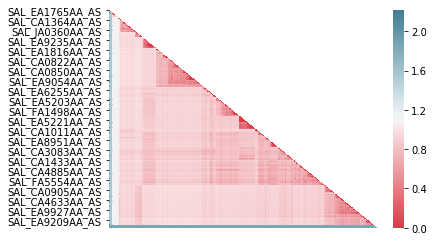

In [35]:
mask = np.zeros_like(dmlg10, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(df_dmlg10, cmap=cmap, mask=mask, xticklabels=False)

In [45]:
df_glst = subtype_node.subtype_level_table(index=hc.df_clusters.index)

In [898]:
df_glst.to_csv(f'SH{df_bin.columns.size}-subtype-levels-min-group-size-5-2snv-{linkage_method}-{pdist_metric}.csv')

In [53]:
def cycle_colors():
    colors = list(matplotlib.cm.Pastel2.colors) + list(matplotlib.cm.Set1.colors)
    n_col = len(colors)
    i = 0
    while True:
        if i >= n_col:
            i = 0
        yield colors[i]
        i += 1

In [54]:
arr = df_glst.astype(np.str_).values

In [55]:
st_to_colour = {st: c for st, c in zip(np.unique(arr), cycle_colors())}

In [56]:
st_to_colour

{'1': (0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 '1.1': (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 '1.1.1': (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 '1.1.1.1': (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 '1.1.1.2': (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 '1.1.10': (1.0, 0.9490196078431372, 0.6823529411764706),
 '1.1.11': (0.9450980392156862, 0.8862745098039215, 0.8),
 '1.1.12': (0.8, 0.8, 0.8),
 '1.1.13': (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 '1.1.14': (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 '1.1.15': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 '1.1.16': (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 '1.1.17': (1.0, 0.4980392156862745, 0.0),
 '1.1.18': (1.0, 1.0, 0.2),
 '1.1.19': (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 '1.1.2': (0.9686274509803922, 0.5058823529411764, 0.749019607

In [57]:
st_to_colour['nan'] = (1.0,1.0,1.0)

In [58]:
def hexcolour(cvec):
    return '#' + ''.join([f'{int(x * 255):2x}' for x in cvec])

In [59]:
hexcolour(st_to_colour['nan'])

'#ffffff'

In [60]:
hexcolour(st_to_colour['1'])

'#b3e2cd'

In [61]:
df_glst_colours = pd.DataFrame(arr).apply(lambda r: r.apply(lambda x: np.array(st_to_colour[x])))

In [62]:
arr = df_glst_colours.values

In [63]:
arr2 = np.array([arr[i,j][k] for i in range(arr.shape[0]) for j in range(arr.shape[1]) for k in range(3)])

In [64]:
arr2.shape = list(arr.shape) + [3]

In [65]:
arr2

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.65098039, 0.3372549 , 0.15686275],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.65098039, 0.3372549 , 0.15686275],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.65098039, 0.3372549 , 0.15686275],
        [1.

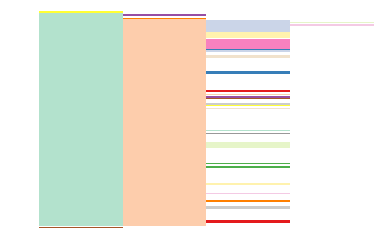

In [66]:
plt.axis('off')
plt.imshow(arr2, aspect='auto')

In [78]:
from scipy.cluster.hierarchy import dendrogram

In [79]:
Z = hc.linkage_array.copy()

In [81]:
Z

array([[3.94000000e+02, 3.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.71000000e+02, 5.78000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.46000000e+02, 4.55000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.69200000e+03, 1.98600000e+03, 3.74566416e+01, 9.00000000e+00],
       [1.99900000e+03, 2.00000000e+03, 6.47765390e+01, 9.98000000e+02],
       [1.96100000e+03, 2.00100000e+03, 1.61062100e+02, 1.00200000e+03]])

In [466]:
d = dendrogram(Z, orientation='left', ax=ax, distance_sort=False, no_labels=True, link_color_func=lambda x: 'gray', no_plot=True)

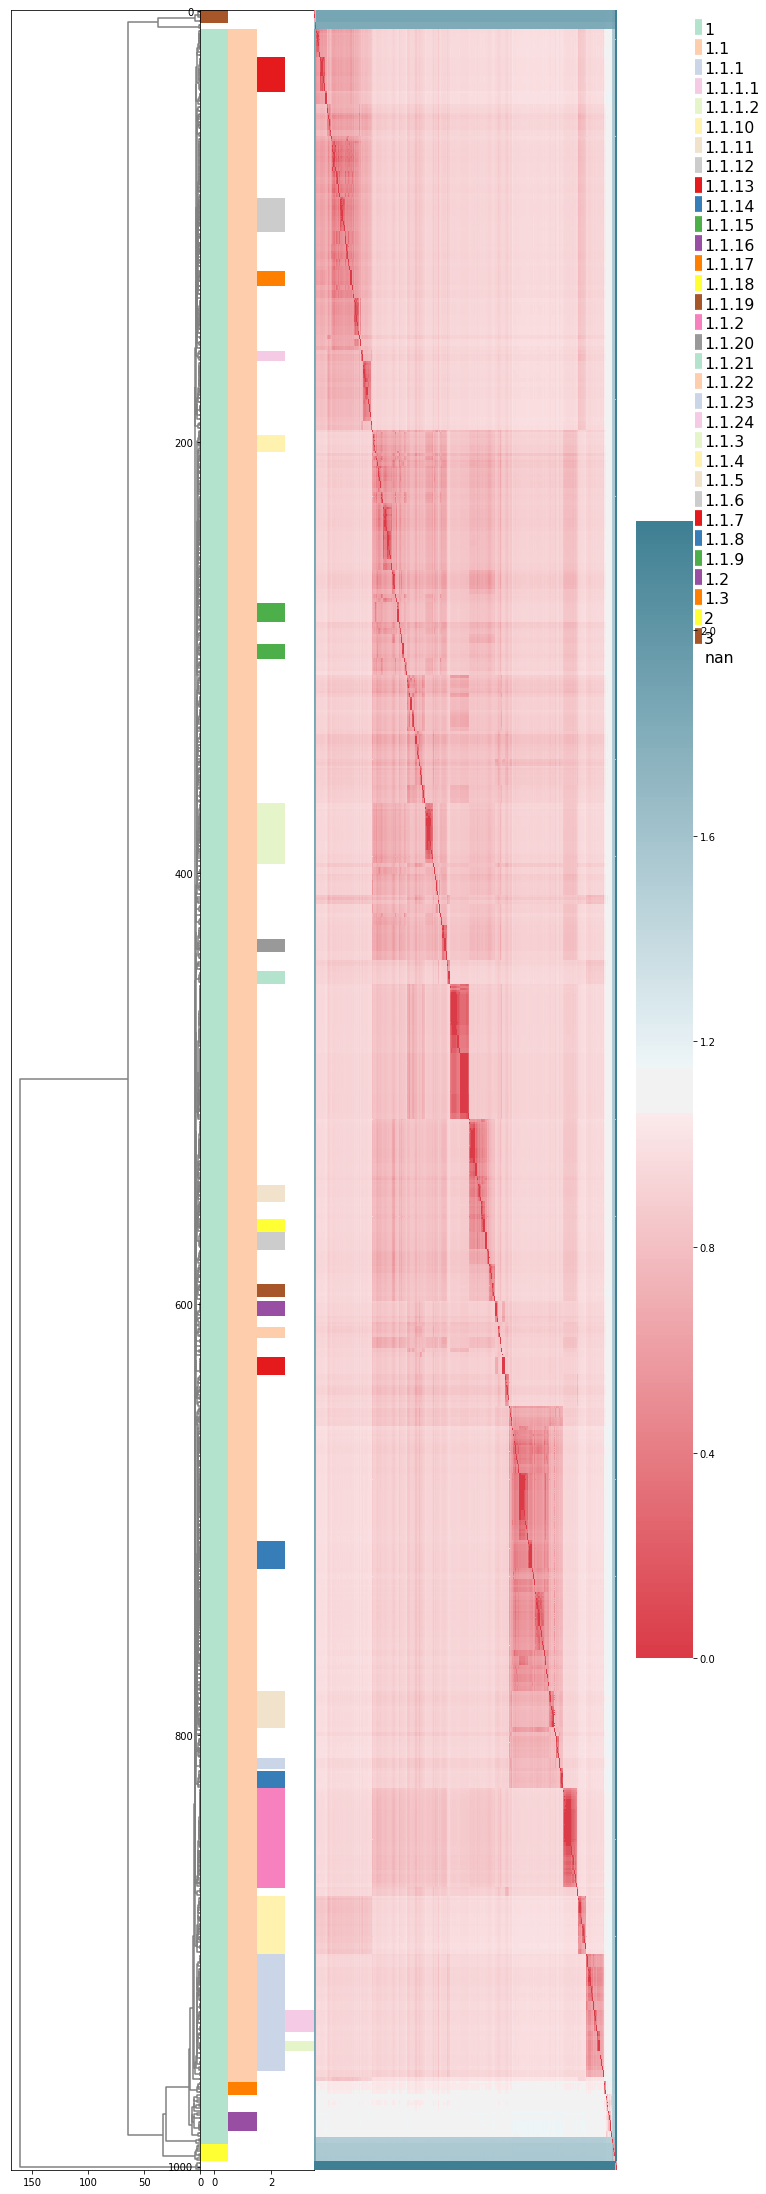

In [85]:
fig, axes = plt.subplots(figsize=(10,30), ncols=4, gridspec_kw=dict(width_ratios=[5,3,10,1]))

ax = axes[0]

dendrogram(Z, orientation='left', ax=ax, distance_sort=False, no_labels=True, link_color_func=lambda x: 'gray')

ax = axes[1]
plt.axis('off')
ax.imshow(arr2[::-1], aspect='auto')

ax = axes[2]

sns.heatmap(df_dmlg10.loc[hc.df_clusters.index[::-1], hc.df_clusters.index[::-1]], cmap=cmap, xticklabels=False, yticklabels=False, ax=ax)

ax = axes[3]

X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / len(st_to_colour) *0.3
w = X

for i, (name,v) in enumerate(st_to_colour.items()):
    if name == '0': continue
    row = i 
    y = Y - (row * h) - h

    xi_line = w * (0.05)
    xf_line = w * (0.25)
    xi_text = w * (0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=v, linewidth=(h * 0.8))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.axis('off')
plt.show()

In [486]:
arr2

array([[[0.85098039, 0.37254902, 0.00784314],
        [0.45882353, 0.43921569, 0.70196078],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]]])

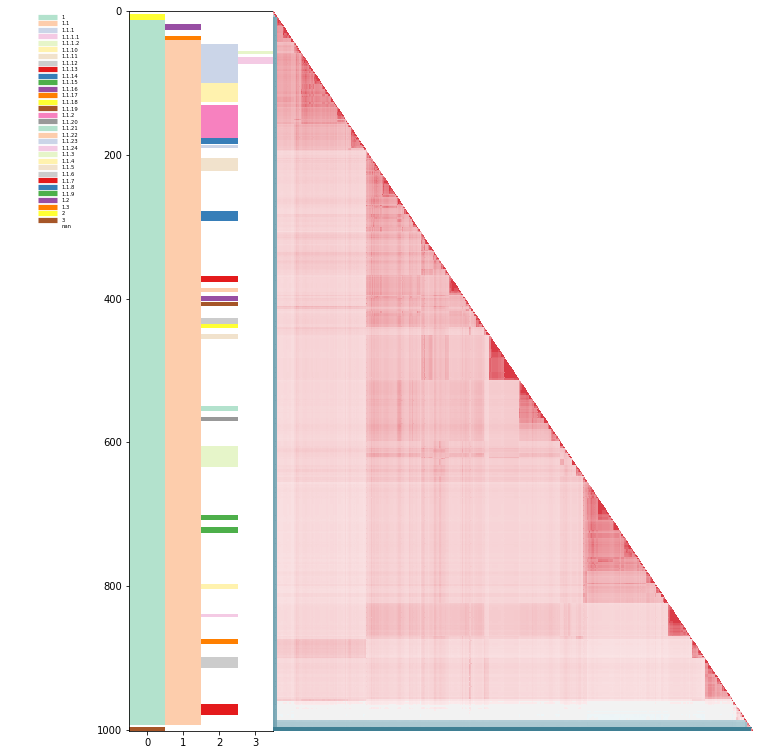

In [87]:

cmap = sns.diverging_palette(10, 220, as_cmap=True)
fig, (ax2, ax0, ax1) = plt.subplots(figsize=(10,10), ncols=3, gridspec_kw=dict(width_ratios=[2,3,10]))
fig.patch.set_facecolor('white')

ax0_imshow = ax0.imshow(arr2, aspect='auto')


ax1_heatmap = sns.heatmap(df_dmlg10.loc[hc.df_clusters.index[::-1], hc.df_clusters.index[::-1]],
            mask=mask,
            cmap=cmap, 
            xticklabels=False,
            yticklabels=False, 
            ax=ax1, 
            cbar=False)

t2 = mpl.transforms.Affine2D().rotate_deg(-45) + ax1.transData
ax1.set_transform(t2)

X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / len(st_to_colour) *0.3
w = X

for i, (name,v) in enumerate(st_to_colour.items()):
    if name == '0': continue
    row = i 
    y = Y - (row * h) - h

    xi_line = w * (0.05)
    xf_line = w * (0.25)
    xi_text = w * (0.3)

    ax2.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax2.hlines(y + h * 0.1, xi_line, xf_line,
              color=v, linewidth=(h * 0.8))

ax2.set_xlim(0, X)
ax2.set_ylim(0, Y)
ax2.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

# Maximum likelihood phylogenetic tree rooting

Setting the root to one of the *Salmonella* Typhimurium genomes in the dataset since the IQTree ML tree is unrooted.

In [36]:
from ete3 import Tree

In [37]:
iqtree_newick = """
(Reference:0.0000020919,(((((((((((((((((((((((((((((((((((((((((((((SAL_BA1710AA_AS:0.0000063453,SAL_CA0770AA_AS:0.0000364984):0.0000042296,(((SAL_CA2721AA_AS:0.0000000000,SAL_CA2813AA_AS:0.0000000000):0.0000000000,SAL_CA5103AA_AS:0.0000000000):0.0000001858,SAL_CA2739AA_AS:0.0000001858):0.0000042298):0.0000001858,(SAL_CA2521AA_AS:0.0000149954,SAL_FA4432AA_AS:0.0000020707):0.0000042297):0.0000001858,((SAL_CA5340AA_AS:0.0000001858,SAL_CA5403AA_AS:0.0000020708):0.0000042296,SAL_EA9976AA_AS:0.0000042297):0.0000042296):0.0000020708,(((SAL_CA1261AA_AS:0.0000020712,SAL_CA4706AA_AS:0.0000020713):0.0000001858,SAL_CA4928AA_AS:0.0000001858):0.0000042298,(((SAL_CA1600AA_AS:0.0000001858,(SAL_CA4932AA_AS:0.0000001858,SAL_CA4941AA_AS:0.0000001858):0.0000084602):0.0000001858,SAL_CA4601AA_AS:0.0000063451):0.0000001858,(SAL_CA5174AA_AS:0.0000001858,SAL_CA5322AA_AS:0.0000020716):0.0000794837):0.0000001858):0.0000020713):0.0000001858,SAL_CA4832AA_AS:0.0000149952):0.0000042295,((((((((SAL_CA1059AA_AS:0.0000020722,(SAL_CA1134AA_AS:0.0000084657,(SAL_CA1244AA_AS:0.0000042304,SAL_CA2765AA_AS:0.0000063456):0.0000001858):0.0000001858):0.0000042302,(((((SAL_CA1536AA_AS:0.0000042308,(SAL_CA4860AA_AS:0.0000001858,SAL_CA4872AA_AS:0.0000001858):0.0000042308):0.0000020733,(SAL_CA2919AA_AS:0.0000001858,SAL_CA2946AA_AS:0.0000001858):0.0000020733):0.0000001858,((SAL_CA3121AA_AS:0.0000923476,SAL_EA4318AA_AS:0.0000084630):0.0000020754,SAL_CA5895AA_AS:0.0000020726):0.0000128782):0.0000020725,SAL_CA5038AA_AS:0.0000084607):0.0000001858,(SAL_CA4984AA_AS:0.0000020723,(SAL_CA5319AA_AS:0.0000001858,SAL_CA5476AA_AS:0.0000001858):0.0000063456):0.0000020725):0.0000001858):0.0000001858,SAL_CA1574AA_AS:0.0000020721):0.0000001858,SAL_CA5012AA_AS:0.0000001858):0.0000001858,SAL_CA5328AA_AS:0.0000042303):0.0000001858,SAL_CA4883AA_AS:0.0000020721):0.0000150029,SAL_CA5644AA_AS:0.0000063455):0.0000042303,(SAL_CA4996AA_AS:0.0000128783,(SAL_CA5021AA_AS:0.0000063454,SAL_CA5069AA_AS:0.0000020720):0.0000020721):0.0000020719):0.0000001858):0.0000001858,SAL_CA1920AA_AS:0.0000063444):0.0000001858,(SAL_CA2503AA_AS:0.0000128802,(SAL_CA2792AA_AS:0.0000020705,SAL_CA2891AA_AS:0.0000001858):0.0000063444):0.0000020708):0.0000001858,SAL_CA4970AA_AS:0.0000063442):0.0000001858,SAL_CA5571AA_AS:0.0000192190):0.0000001858,(SAL_CA2158AA_AS:0.0000001858,SAL_CA4840AA_AS:0.0000001858):0.0000192189):0.0000020702,((((((((SAL_CA0548AA_AS:0.0000001858,SAL_CA2667AA_AS:0.0000020700):0.0000042292,SAL_CA1220AA_AS:0.0000020699):0.0000001858,((SAL_CA1096AA_AS:0.0000001858,SAL_CA1448AA_AS:0.0000001858):0.0000020700,SAL_CA4848AA_AS:0.0000001858):0.0000042293):0.0000001858,SAL_CA1489AA_AS:0.0000020699):0.0000001858,SAL_CA1198AA_AS:0.0000001858):0.0000020700,(((((SAL_CA1209AA_AS:0.0000063441,SAL_CA2702AA_AS:0.0000042293):0.0000020703,SAL_CA2110AA_AS:0.0000042293):0.0000001858,SAL_CA2117AA_AS:0.0000063440):0.0000001858,SAL_CA5894AA_AS:0.0000020700):0.0000001858,SAL_EA4484AA_AS:0.0000020700):0.0000020701):0.0000001858,SAL_CA0871AA_AS:0.0000001858):0.0000001858,SAL_CA4854AA_AS:0.0000001858):0.0000105733):0.0000001858,((SAL_CA2833AA_AS:0.0000128780,((SAL_CA4667AA_AS:0.0000001858,SAL_JA0542AA_AS:0.0000001858):0.0000020699,SAL_CA5213AA_AS:0.0000042291):0.0000020699):0.0000001858,SAL_CA5734AA_AS:0.0000128780):0.0000020698):0.0000001858,((((((SAL_CA0784AA_AS:0.0000105742,SAL_CA1500AA_AS:0.0000020698):0.0000042294,SAL_CA5803AA_AS:0.0000042290):0.0000020697,SAL_CA4910AA_AS:0.0000042290):0.0000001858,SAL_CA5028AA_AS:0.0000213511):0.0000001858,((SAL_CA4886AA_AS:0.0000020695,SAL_CA5024AA_AS:0.0000063435):0.0000020695,SAL_CA5036AA_AS:0.0000105726):0.0000042289):0.0000001858,SAL_CA5797AA_AS:0.0000149951):0.0000063433):0.0000001858,(((SAL_CA4611AA_AS:0.0000001858,SAL_EA9927AA_AS:0.0000001858):0.0000020693,SAL_CA5160AA_AS:0.0000020693):0.0000001858,SAL_CA5331AA_AS:0.0000001858):0.0000042288):0.0000001858,(((((((((((SAL_BA2898AA_AS:0.0000084576,SAL_EA4592AA_AS:0.0000020692):0.0000001858,SAL_EA5128AA_AS:0.0000105774):0.0000020691,(SAL_BA3282AA_AS:0.0000001858,(SAL_EA8947AA_AS:0.0000020693,SAL_JA4045AA_AS:0.0000001858):0.0000001858):0.0000063433):0.0000001858,SAL_EA5450AA_AS:0.0000020691):0.0000001858,(SAL_EA4576AA_AS:0.0000001858,SAL_EA5343AA_AS:0.0000001858):0.0000020691):0.0000042287,SAL_EA4835AA_AS:0.0000128779):0.0000020692,(SAL_EA9437AA_AS:0.0000084574,SAL_EA9555AA_AS:0.0000001858):0.0000105719):0.0000042286,(((((SAL_EA4448AA_AS:0.0002126996,SAL_EA5497AA_AS:0.0000042285):0.0000001858,SAL_EA4830AA_AS:0.0000063422):0.0000001858,SAL_EA4711AA_AS:0.0000063422):0.0000001858,SAL_EA9428AA_AS:0.0000001858):0.0000001858,SAL_EA9411AA_AS:0.0000063422):0.0000235042):0.0000001858,SAL_EA9421AA_AS:0.0000192291):0.0000063419,(SAL_EA4512AA_AS:0.0000149949,((((SAL_EA4560AA_AS:0.0000042279,(SAL_EA4562AA_AS:0.0000020962,(SAL_EA4564AA_AS:0.0000020962,SAL_EA4598AA_AS:0.0000001858):0.0000001858):0.0000001858):0.0000001858,SAL_IA6099AA_AS:0.0000042279):0.0000020961,(SAL_EA5354AA_AS:0.0000084559,(((SAL_EA8919AA_AS:0.0000192295,SAL_EA9209AA_AS:0.0000001858):0.0000001858,SAL_EA9196AA_AS:0.0000001858):0.0000001858,SAL_EA9221AA_AS:0.0000042279):0.0000042279):0.0000001858):0.0000001858,(SAL_EA4611AA_AS:0.0000020958,(((SAL_EA4702AA_AS:0.0000020960,SAL_EA4774AA_AS:0.0000020961):0.0000001858,SAL_EA4849AA_AS:0.0000128778):0.0000020959,SAL_EA4772AA_AS:0.0000042278):0.0000020959):0.0000020958):0.0000001858):0.0000105698):0.0000128779,((((((SAL_CA1897AA_AS:0.0000000000,SAL_CA5263AA_AS:0.0000000000):0.0000000000,SAL_CA1942AA_AS:0.0000000000):0.0000000000,SAL_CA1963AA_AS:0.0000000000):0.0000001858,SAL_CA1912AA_AS:0.0000001858):0.0000020954,SAL_CA4641AA_AS:0.0000001858):0.0000001858,SAL_CA4633AA_AS:0.0000001858):0.0000042276):0.0000042277):0.0000001858,SAL_CA5229AA_AS:0.0000149948):0.0000001858,(SAL_CA5287AA_AS:0.0000001858,SAL_CA5303AA_AS:0.0000001858):0.0000084552):0.0000001858,(SAL_CA5220AA_AS:0.0000001858,SAL_CA5233AA_AS:0.0000001858):0.0000084552):0.0000171370,(((((((((SAL_CA0311AA_AS:0.0000000000,SAL_CA0361AA_AS:0.0000000000):0.0000000000,SAL_CA0351AA_AS:0.0000000000):0.0000001858,SAL_CA0321AA_AS:0.0000001858):0.0000105686,((SAL_CA0403AA_AS:0.0000001858,SAL_CA0422AA_AS:0.0000001858):0.0000105687,((((SAL_CA0744AA_AS:0.0000171369,((((SAL_CA1021AA_AS:0.0000001858,SAL_CA2216AA_AS:0.0000001858):0.0000128776,SAL_CA4934AA_AS:0.0000001858):0.0000020947,SAL_CA4995AA_AS:0.0000128777):0.0000001858,SAL_CA4691AA_AS:0.0000063413):0.0000001858):0.0000020943,((SAL_CA0887AA_AS:0.0000001858,SAL_CA0905AA_AS:0.0000001858):0.0000020946,(SAL_CA2140AA_AS:0.0000001858,SAL_CA2430AA_AS:0.0000001858):0.0000063410):0.0000020944):0.0000001858,SAL_CA5448AA_AS:0.0000063411):0.0000001858,SAL_CA4619AA_AS:0.0000020942):0.0000020941):0.0000001858):0.0000001858,(SAL_CA1615AA_AS:0.0000192297,SAL_CA4710AA_AS:0.0000001858):0.0000020937):0.0000020937,SAL_CA4884AA_AS:0.0000001858):0.0000001858,SAL_CA4991AA_AS:0.0000020937):0.0000020937,(((SAL_CA4921AA_AS:0.0000000000,SAL_CA4924AA_AS:0.0000000000):0.0000001858,SAL_CA4923AA_AS:0.0000001858):0.0000020937,SAL_CA4927AA_AS:0.0000020936):0.0000020936):0.0000001858,(SAL_CA4671AA_AS:0.0000001858,SAL_CA4683AA_AS:0.0000001858):0.0000042272):0.0000300578):0.0000001858,(((((SAL_CA4936AA_AS:0.0000279214,(((SAL_CA4994AA_AS:0.0000213666,SAL_CA5137AA_AS:0.0000020931):0.0000020930,SAL_EA4533AA_AS:0.0000364966):0.0000128776,SAL_CA5166AA_AS:0.0000256003):0.0000001858):0.0000020921,((SAL_CA4958AA_AS:0.0000105676,SAL_CA5146AA_AS:0.0000149949):0.0000020914,(SAL_CA5761AA_AS:0.0000084538,SAL_CA5807AA_AS:0.0000255993):0.0000084541):0.0000128776):0.0000001858,SAL_CA5705AA_AS:0.0000322020):0.0000020690,(SAL_CA5313AA_AS:0.0000300557,SAL_CA5688AA_AS:0.0000063403):0.0000020911):0.0000042266,((SAL_CA5267AA_AS:0.0000343514,SAL_EA4727AA_AS:0.0000578586):0.0000128764,SAL_CA5770AA_AS:0.0000578553):0.0000020901):0.0000042262):0.0000001858,SAL_CA5311AA_AS:0.0000664254):0.0000001858,SAL_CA5696AA_AS:0.0000343488):0.0000042295,((((((((((SAL_BA3321AA_AS:0.0000020947,SAL_EA3468AA_AS:0.0000020946):0.0000020946,SAL_JA1035AA_AS:0.0000084525):0.0000063387,(((SAL_CA1720AA_AS:0.0000001858,SAL_CA1801AA_AS:0.0000001858):0.0000063388,((SAL_EA3660AA_AS:0.0000149945,SAL_EA5616AA_AS:0.0000322019):0.0000001858,SAL_IA1750AA_AS:0.0000322017):0.0000020947):0.0000001858,SAL_FA1768AA_AS:0.0000128771):0.0000001858):0.0000001858,(SAL_CA2618AA_AS:0.0000063386,SAL_EA9641AA_AS:0.0000063386):0.0000149945):0.0000001858,SAL_IA6451AA_AS:0.0000149944):0.0000001858,SAL_CA0683AA_AS:0.0000192288):0.0000001858,(((SAL_CA1693AA_AS:0.0000020941,SAL_CA1756AA_AS:0.0000020941):0.0000001858,SAL_EA9727AA_AS:0.0000128772):0.0000149947,SAL_CA1824AA_AS:0.0000235034):0.0000128772):0.0000063383,(SAL_BA5029AA_AS:0.0000042286,(((SAL_CA1675AA_AS:0.0000020934,((SAL_CA1795AA_AS:0.0000128789,SAL_CA2560AA_AS:0.0000042287):0.0000001858,(SAL_EA3654AA_AS:0.0000149944,(SAL_FA1770AA_AS:0.0000020937,SAL_IA1794AA_AS:0.0000042288):0.0000020936):0.0000042288):0.0000001858):0.0000001858,SAL_EA5248AA_AS:0.0000063381):0.0000020933,SAL_IA3159AA_AS:0.0000042290):0.0000042286):0.0000105638):0.0000001858,SAL_EA4775AA_AS:0.0000020932):0.0000428530,((SAL_CA1254AA_AS:0.0000063376,((SAL_CA1583AA_AS:0.0000042287,SAL_CA4878AA_AS:0.0000001858):0.0000063377,SAL_CA4866AA_AS:0.0000020925):0.0000001858):0.0000322061,((((SAL_CA1833AA_AS:0.0000063377,SAL_CA1859AA_AS:0.0000001858):0.0000084506,SAL_CA4617AA_AS:0.0000063377):0.0000001858,SAL_CA5029AA_AS:0.0000192792):0.0000020927,SAL_CA5044AA_AS:0.0000105631):0.0000084505):0.0000105637):0.0000042280):0.0000385664,((((((((((((((((((((((((((((((((((((((SAL_BA2742AA_AS:0.0000001858,SAL_EA1761AA_AS:0.0000021194):0.0000021193,SAL_EA9531AA_AS:0.0000042795):0.0000064222,(((((((((((((((SAL_BA3103AA_AS:0.0000000000,SAL_EA4522AA_AS:0.0000000000):0.0000000000,SAL_EA4861AA_AS:0.0000000000):0.0000000000,SAL_EA4393AA_AS:0.0000000000):0.0000000000,SAL_EA4454AA_AS:0.0000000000):0.0000000000,SAL_EA4398AA_AS:0.0000000000):0.0000000000,SAL_EA4402AA_AS:0.0000000000):0.0000001858,SAL_BA4327AA_AS:0.0000001858):0.0000001858,SAL_EA4405AA_AS:0.0000042798):0.0000021194,((((SAL_BA5795AA_AS:0.0000021197,SAL_IA2537AA_AS:0.0000021196):0.0000021195,SAL_EA4568AA_AS:0.0000042803):0.0000001858,SAL_EA9142AA_AS:0.0001505041):0.0000085636,(SAL_EA5739AA_AS:0.0000021194,(SAL_EA9006AA_AS:0.0000128454,SAL_EA9134AA_AS:0.0000042797):0.0000001858):0.0000001858):0.0000001858):0.0000001858,((SAL_BA4270AA_AS:0.0000064224,SAL_CA0992AA_AS:0.0000042797):0.0000001858,SAL_CA1001AA_AS:0.0000085633):0.0000021194):0.0000001858,SAL_EA9217AA_AS:0.0000021194):0.0000001858,SAL_EA9081AA_AS:0.0000085632):0.0000001858,SAL_EA5600AA_AS:0.0000021194):0.0000001858,(SAL_CA1961AA_AS:0.0000064224,SAL_EA9351AA_AS:0.0000021194):0.0000064223):0.0000001858,SAL_EA8931AA_AS:0.0000107038):0.0000001858):0.0000001858,SAL_EA5306AA_AS:0.0000385365):0.0000001858,(SAL_EA9004AA_AS:0.0000001858,SAL_EA9213AA_AS:0.0000001858):0.0000021193):0.0000021193,(SAL_BA4609AA_AS:0.0002514440,(SAL_CA0693AA_AS:0.0000064238,SAL_CA0909AA_AS:0.0000001858):0.0000001858):0.0000042792):0.0000001858,SAL_EA9054AA_AS:0.0000085608):0.0000001858,(SAL_BA4112AA_AS:0.0000021192,SAL_EA8988AA_AS:0.0000001858):0.0000064205):0.0000064204,((((((((SAL_CA0272AA_AS:0.0000001858,SAL_CA5236AA_AS:0.0000042781):0.0000021192,(((SAL_CA0801AA_AS:0.0000042773,SAL_CA0877AA_AS:0.0000320969):0.0000001858,SAL_CA4844AA_AS:0.0000021192):0.0000001858,(SAL_CA1339AA_AS:0.0000001858,SAL_CA1378AA_AS:0.0002084335):0.0000064198):0.0000001858):0.0000001858,SAL_CA2325AA_AS:0.0000021192):0.0000001858,SAL_CA0832AA_AS:0.0000085601):0.0000001858,SAL_CA1389AA_AS:0.0000558855):0.0000001858,SAL_CA4957AA_AS:0.0000021192):0.0000001858,SAL_CA1396AA_AS:0.0000149812):0.0000001858,SAL_JA0849AA_AS:0.0000021192):0.0000085606):0.0000001858,((SAL_CA0892AA_AS:0.0000213964,SAL_CA2455AA_AS:0.0000149770):0.0000021191,SAL_IA2585AA_AS:0.0000064187):0.0000064187):0.0000001858,(SAL_CA0841AA_AS:0.0000256752,SAL_FA5288AA_AS:0.0000106976):0.0000064182):0.0000001858,((((SAL_CA0210AA_AS:0.0001053409,SAL_CA0292AA_AS:0.0000408427):0.0000064187,((SAL_CA0860AA_AS:0.0000001858,SAL_JA7597AA_AS:0.0000451360):0.0000128347,(SAL_CA1103AA_AS:0.0000106952,SAL_CA1424AA_AS:0.0000021190):0.0000085562):0.0000021190):0.0000001858,(SAL_CA1173AA_AS:0.0000128369,SAL_CA1382AA_AS:0.0000128368):0.0000106969):0.0000001858,(SAL_CA1673AA_AS:0.0000001858,SAL_CA5250AA_AS:0.0000001858):0.0000042770):0.0000021191):0.0000001858,(SAL_CA0790AA_AS:0.0000149731,((SAL_CA4979AA_AS:0.0000001858,SAL_JA7599AA_AS:0.0000042759):0.0000001858,SAL_CA5266AA_AS:0.0000021190):0.0000064169):0.0000021190):0.0000001858,((SAL_CA1745AA_AS:0.0000000000,SAL_CA4965AA_AS:0.0000000000):0.0000001858,SAL_CA1770AA_AS:0.0000001858):0.0000085568):0.0000001858,((((SAL_CA0822AA_AS:0.0000001858,SAL_CA1359AA_AS:0.0000320852):0.0000128334,SAL_CA5056AA_AS:0.0000085556):0.0000021189,SAL_CA1403AA_AS:0.0000064166):0.0000001858,SAL_CA5256AA_AS:0.0000064175):0.0000042760):0.0000001858,SAL_CA2464AA_AS:0.0000171107):0.0000042757,((((((SAL_CA0104AA_AS:0.0000171084,(SAL_CA1648AA_AS:0.0000085540,SAL_CA5274AA_AS:0.0000192493):0.0000001858):0.0000042753,(((((((((SAL_CA0117AA_AS:0.0000042747,SAL_FA4740AA_AS:0.0000001858):0.0000085532,((SAL_CA3289AA_AS:0.0000042741,((SAL_FA3738AA_AS:0.0000001858,SAL_FA4706AA_AS:0.0000001858):0.0000064139,SAL_FA3740AA_AS:0.0000064138):0.0000001858):0.0000001858,(SAL_FA3736AA_AS:0.0001784855,SAL_FA4722AA_AS:0.0000001858):0.0000064147):0.0000001858):0.0000001858,SAL_CA3192AA_AS:0.0000001858):0.0000021188,SAL_CA5118AA_AS:0.0000064148):0.0000001858,SAL_CA5128AA_AS:0.0000128301):0.0000001858,SAL_TA7455AA_AS:0.0000235236):0.0000001858,SAL_CA3256AA_AS:0.0000192463):0.0000001858,SAL_CA2848AA_AS:0.0000106921):0.0000001858,SAL_CA5133AA_AS:0.0000128307):0.0000021189):0.0000001858,(((((SAL_CA1318AA_AS:0.0000064157,SAL_CA5051AA_AS:0.0000106930):0.0000042753,(SAL_CA5115AA_AS:0.0000042752,SAL_FA3864AA_AS:0.0000085542):0.0000001858):0.0000021191,SAL_CA2856AA_AS:0.0000171092):0.0000001858,SAL_EA6969AA_AS:0.0000192488):0.0000001858,SAL_CA1374AA_AS:0.0000064160):0.0000021187):0.0000001858,SAL_CA4574AA_AS:0.0000064168):0.0000021189,SAL_CA3225AA_AS:0.0000128324):0.0000021191,(SAL_CA1183AA_AS:0.0000001858,SAL_CA5244AA_AS:0.0000021190):0.0000171102):0.0000042758):0.0000001858,(SAL_CA1308AA_AS:0.0000472927,SAL_CA1430AA_AS:0.0001333188):0.0000106828):0.0000001858,(SAL_CA2511AA_AS:0.0000042740,((SAL_CA5334AA_AS:0.0000106882,SAL_CA5338AA_AS:0.0000644847):0.0000001858,SAL_FA4720AA_AS:0.0000085505):0.0000021188):0.0000042737):0.0000001858,(((SAL_CA0187AA_AS:0.0000021187,SAL_CA1445AA_AS:0.0000429193):0.0000064124,SAL_CA0850AA_AS:0.0000001858):0.0000085499,SAL_CA0779AA_AS:0.0000064123):0.0000085501):0.0000001858,((SAL_CA0133AA_AS:0.0000277929,SAL_CA0812AA_AS:0.0000213747):0.0000021189,(SAL_CA0239AA_AS:0.0000001858,SAL_CA1414AA_AS:0.0000021187):0.0000128242):0.0000042732):0.0000001858,SAL_CA3014AA_AS:0.0000001858):0.0000001858,SAL_CA3126AA_AS:0.0000042727):0.0000001858,SAL_EA3920AA_AS:0.0000192357):0.0000001858,SAL_CA2576AA_AS:0.0000128298):0.0000106862,((((SAL_CA0883AA_AS:0.0001612803,((SAL_CA1160AA_AS:0.0000001858,SAL_HA9399AA_AS:0.0000064129):0.0000085456,(((SAL_CA1264AA_AS:0.0000021185,SAL_CA1699AA_AS:0.0000064096):0.0000021184,SAL_CA1299AA_AS:0.0000106819):0.0000064090,(SAL_CA5223AA_AS:0.0000064089,SAL_HA9448AA_AS:0.0000213647):0.0000042710):0.0000001858):0.0000001858):0.0000001858,SAL_CA0901AA_AS:0.0000001858):0.0000001858,SAL_CA7288AA_AS:0.0000001858):0.0000256483,SAL_CA1366AA_AS:0.0002967694):0.0000042358):0.0000106815,(((SAL_CA0868AA_AS:0.0000795401,(((SAL_CA1682AA_AS:0.0000042703,SAL_CA1753AA_AS:0.0000021184):0.0000064080,SAL_CA2388AA_AS:0.0000234974):0.0000001858,SAL_CA5252AA_AS:0.0000128165):0.0000001858):0.0000021184,((((((SAL_CA0876AA_AS:0.0000967457,SAL_JA0769AA_AS:0.0000064079):0.0000021183,(SAL_CA1438AA_AS:0.0000021184,SAL_JA0859AA_AS:0.0000192223):0.0000064072):0.0000001858,SAL_CA4975AA_AS:0.0000085437):0.0000001858,SAL_CA5262AA_AS:0.0000042701):0.0000001858,((SAL_CA1375AA_AS:0.0000042701,SAL_JA7598AA_AS:0.0000042701):0.0000001858,SAL_CA4967AA_AS:0.0000064078):0.0000021184):0.0000001858,SAL_CA1330AA_AS:0.0000001858):0.0000128160):0.0000001858,(SAL_CA5228AA_AS:0.0000001858,SAL_CA5240AA_AS:0.0000001858):0.0000085449):0.0000192294):0.0000001858,(SAL_CA0946AA_AS:0.0000322414,SAL_JA0825AA_AS:0.0000085432):0.0000042703):0.0000001858,(((((((SAL_BA3053AA_AS:0.0000001858,(SAL_CA0078AA_AS:0.0000001858,SAL_IA6337AA_AS:0.0000001858):0.0000021183):0.0000001858,SAL_EA1816AA_AS:0.0000106776):0.0000001858,SAL_EA4504AA_AS:0.0000192199):0.0000021183,SAL_CA0270AA_AS:0.0000064065):0.0000001858,SAL_EA5599AA_AS:0.0000001858):0.0000001858,SAL_CA2634AA_AS:0.0000085421):0.0000064075,SAL_CA2481AA_AS:0.0000170861):0.0000322408):0.0000001858,SAL_CA1609AA_AS:0.0000192194):0.0000001858,SAL_CA2303AA_AS:0.0000300950):0.0000106749,((((((SAL_CA0923AA_AS:0.0000000000,SAL_CA2177AA_AS:0.0000000000):0.0000001858,SAL_CA0941AA_AS:0.0000064046):0.0000001858,SAL_CA1505AA_AS:0.0000042361):0.0000001858,SAL_CA1521AA_AS:0.0000001858):0.0000234859,(SAL_CA0955AA_AS:0.0000344051,SAL_CA5232AA_AS:0.0000300931):0.0000192183):0.0000042361,(((SAL_CA1464AA_AS:0.0000428758,SAL_CA1483AA_AS:0.0000256242):0.0000021178,SAL_CA2352AA_AS:0.0000623375):0.0000001858,SAL_CA4985AA_AS:0.0000322398):0.0000021182):0.0000021200):0.0000343917,SAL_FA4939AA_AS:0.0000106741):0.0000001858,((((((((SAL_BA5695AA_AS:0.0000000000,SAL_FA0574AA_AS:0.0000000000):0.0000000000,SAL_FA0558AA_AS:0.0000000000):0.0000000000,SAL_FA0571AA_AS:0.0000000000):0.0000001858,((SAL_FA0541AA_AS:0.0000578973,SAL_FA0553AA_AS:0.0000001858):0.0000001858,SAL_FA0565AA_AS:0.0000021181):0.0000001858):0.0000149426,(SAL_FA0564AA_AS:0.0000001858,SAL_FA0572AA_AS:0.0000021181):0.0000064040):0.0000042360,SAL_FA4122AA_AS:0.0000128082):0.0000042362,(((((((SAL_CA5506AA_AS:0.0000000000,SAL_CA5625AA_AS:0.0000000000):0.0000000000,SAL_CA5616AA_AS:0.0000000000):0.0000000000,SAL_CA5670AA_AS:0.0000000000):0.0000000000,SAL_CA5588AA_AS:0.0000000000):0.0000001858,SAL_CA5577AA_AS:0.0000021182):0.0000001858,SAL_CA5573AA_AS:0.0000021182):0.0000001858,SAL_CA5575AA_AS:0.0000001858):0.0000300941):0.0000213545,SAL_FA3616AA_AS:0.0000106745):0.0000085395):0.0000001858,SAL_CA4971AA_AS:0.0000924429):0.0000085373,(((((((((((((SAL_BA2797AA_AS:0.0000000000,SAL_IA3371AA_AS:0.0000000000):0.0000000000,SAL_EA5646AA_AS:0.0000000000):0.0000000000,SAL_IA2768AA_AS:0.0000000000):0.0000001858,(((((((((((((((((((SAL_BA3473AA_AS:0.0001353386,(SAL_CA0964AA_AS:0.0000001858,(SAL_EA4579AA_AS:0.0000063510,SAL_EA9068AA_AS:0.0000020785):0.0000128841):0.0000001858):0.0000020776,(SAL_EA4572AA_AS:0.0000363666,(((SAL_EA5576AA_AS:0.0000020792,(SAL_EA5736AA_AS:0.0000020792,SAL_FA1974AA_AS:0.0000042343):0.0000001858):0.0000001858,SAL_JA4008AA_AS:0.0000063512):0.0000020792,(SAL_EA5595AA_AS:0.0000001858,SAL_EA9235AA_AS:0.0000579742):0.0000042340):0.0000020788):0.0000001858):0.0000001858,SAL_EA5644AA_AS:0.0000020777):0.0000001858,(SAL_EA5253AA_AS:0.0000536802,SAL_EA9568AA_AS:0.0000773058):0.0000042322):0.0000001858,SAL_FA1501AA_AS:0.0000084664):0.0000001858,SAL_EA9354AA_AS:0.0000063492):0.0000001858,SAL_EA9205AA_AS:0.0000063492):0.0000001858,SAL_EA9594AA_AS:0.0000020768):0.0000001858,SAL_EA9585AA_AS:0.0000042328):0.0000001858,(SAL_EA5584AA_AS:0.0000001858,SAL_EA8838AA_AS:0.0000001858):0.0000020767):0.0000001858,SAL_EA9645AA_AS:0.0000020768):0.0000001858,SAL_EA1673AA_AS:0.0000042327):0.0000001858,SAL_EA5562AA_AS:0.0000150252):0.0000001858,SAL_EA5808AA_AS:0.0000063490):0.0000001858,SAL_EA5812AA_AS:0.0000020766):0.0000001858,SAL_EA5797AA_AS:0.0000408185):0.0000001858,SAL_BA5394AA_AS:0.0000001858):0.0000001858,SAL_EA4621AA_AS:0.0000171382):0.0000001858,SAL_EA5443AA_AS:0.0001396115):0.0000001858):0.0000001858,SAL_EA8998AA_AS:0.0000063481):0.0000042320,(SAL_CA0929AA_AS:0.0000171380,(SAL_CA0976AA_AS:0.0000105807,SAL_EA4294AA_AS:0.0000128838):0.0000020762):0.0000001858):0.0000001858,(((SAL_BA3116AA_AS:0.0000063477,SAL_EA5577AA_AS:0.0000150029):0.0000001858,SAL_EA4492AA_AS:0.0000063477):0.0000001858,SAL_EA5820AA_AS:0.0000063477):0.0000020751):0.0000001858,((SAL_BA3988AA_AS:0.0000105794,(SAL_EA4642AA_AS:0.0000001858,SAL_EA9082AA_AS:0.0000020751):0.0000020751):0.0000001858,SAL_EA8944AA_AS:0.0000042317):0.0000042317):0.0000472417,(((((((((((((SAL_BA2887AA_AS:0.0000001858,SAL_FA1507AA_AS:0.0000105849):0.0000020829,(SAL_BA4606AA_AS:0.0000105837,SAL_FA1509AA_AS:0.0000063501):0.0000001858):0.0000150254,(((((((((((((((SAL_BA3094AA_AS:0.0000001858,(SAL_BA9957AA_AS:0.0000001858,SAL_FA1377AA_AS:0.0000020874):0.0000001858):0.0000001858,SAL_FA1376AA_AS:0.0000020873):0.0000020873,(SAL_BA9768AA_AS:0.0000001858,SAL_FA1512AA_AS:0.0000042349):0.0000001858):0.0000042349,(((((SAL_BA5639AA_AS:0.0000020876,((SAL_FA1504AA_AS:0.0000042351,SAL_FA1973AA_AS:0.0000020876):0.0000001858,SAL_FA1510AA_AS:0.0000020876):0.0000001858):0.0000001858,SAL_FA1505AA_AS:0.0000020876):0.0000001858,SAL_FA1513AA_AS:0.0000020875):0.0000063525,SAL_FA1503AA_AS:0.0000063524):0.0000001858,SAL_EA4944AA_AS:0.0000063524):0.0000001858):0.0000001858,SAL_FA1496AA_AS:0.0000192758):0.0000063522,(SAL_CA0760AA_AS:0.0000020870,SAL_FA1511AA_AS:0.0000127044):0.0000042350):0.0000020870,(((SAL_BA3732AA_AS:0.0000020878,(((((((((((((((SAL_CA1978AA_AS:0.0000000000,SAL_EA1809AA_AS:0.0000000000):0.0000000000,SAL_EA1807AA_AS:0.0000000000):0.0000000000,SAL_IA2678AA_AS:0.0000000000):0.0000000000,SAL_IA1746AA_AS:0.0000000000):0.0000000000,SAL_EA1808AA_AS:0.0000000000):0.0000000000,SAL_IA9918AA_AS:0.0000000000):0.0000001858,SAL_EA1806AA_AS:0.0000001858):0.0000020881,(SAL_EA5851AA_AS:0.0000020883,SAL_EA9573AA_AS:0.0000063528):0.0000020882):0.0000001858,SAL_JA1022AA_AS:0.0000127051):0.0000001858,(((((SAL_CA2414AA_AS:0.0000000000,SAL_EA5847AA_AS:0.0000000000):0.0000000000,SAL_EA5852AA_AS:0.0000000000):0.0000001858,SAL_EA4283AA_AS:0.0000001858):0.0000020883,SAL_EA4284AA_AS:0.0000042353):0.0000001858,SAL_EA5850AA_AS:0.0000001858):0.0000063529):0.0000001858,SAL_EA4471AA_AS:0.0000020880):0.0000001858,SAL_EA9990AA_AS:0.0000020880):0.0000001858,SAL_FA1497AA_AS:0.0000020880):0.0000001858,SAL_FA1500AA_AS:0.0000127050):0.0000001858,SAL_JA3989AA_AS:0.0000063526):0.0000001858):0.0000001858,SAL_EA5848AA_AS:0.0000001858):0.0000001858,SAL_FA1499AA_AS:0.0000150327):0.0000063525):0.0000001858,((((SAL_BA5145AA_AS:0.0000127038,(SAL_EA4127AA_AS:0.0000063520,SAL_FA1516AA_AS:0.0000084717):0.0000001858):0.0000001858,SAL_IA1866AA_AS:0.0000105866):0.0000001858,((SAL_EA1811AA_AS:0.0000001858,SAL_IA2701AA_AS:0.0000001858):0.0000063520,SAL_EA4131AA_AS:0.0000042347):0.0000020866):0.0000001858,SAL_EA5855AA_AS:0.0000020865):0.0000063519):0.0000001858,SAL_FA1498AA_AS:0.0000127036):0.0000042345,((SAL_BA3402AA_AS:0.0000042344,(((SAL_CA0918AA_AS:0.0000020861,SAL_EA1732AA_AS:0.0000001858):0.0000001858,SAL_EA8843AA_AS:0.0000084711):0.0000020860,((SAL_CA0938AA_AS:0.0000084712,SAL_CA4687AA_AS:0.0000042345):0.0000001858,SAL_FA7519AA_AS:0.0000127032):0.0000001858):0.0000001858):0.0000001858,SAL_EA4433AA_AS:0.0000084709):0.0000127030):0.0000001858,SAL_EA4519AA_AS:0.0000171279):0.0000150257,(((SAL_BA3601AA_AS:0.0000001858,SAL_EA5345AA_AS:0.0000235652):0.0000020852,((SAL_EA4811AA_AS:0.0000001858,SAL_EA5110AA_AS:0.0000020854):0.0000020854,(SAL_EA5860AA_AS:0.0000001858,SAL_EA9387AA_AS:0.0000105860):0.0000001858):0.0000001858):0.0000001858,SAL_EA5117AA_AS:0.0000020852):0.0000150260):0.0000105856,((SAL_CA4586AA_AS:0.0000042337,(((((SAL_EA4408AA_AS:0.0000063509,(SAL_EA5611AA_AS:0.0000001858,SAL_EA9124AA_AS:0.0000020845):0.0000063509):0.0000001858,SAL_EA5281AA_AS:0.0000063508):0.0000020844,(SAL_EA4808AA_AS:0.0000001858,SAL_EA4851AA_AS:0.0000192651):0.0000020842):0.0000105846,(SAL_EA4574AA_AS:0.0000105849,((((SAL_EA4640AA_AS:0.0000020850,SAL_EA5203AA_AS:0.0000020850):0.0000001858,SAL_IA2550AA_AS:0.0000020850):0.0000042342,(SAL_EA5210AA_AS:0.0000063517,SAL_EA5291AA_AS:0.0000192678):0.0000105862):0.0000020850,(SAL_EA9483AA_AS:0.0000001858,SAL_EA9484AA_AS:0.0000020846):0.0000105849):0.0000001858):0.0000001858):0.0000020840,SAL_EA4859AA_AS:0.0000150255):0.0000020841):0.0000042363,SAL_EA5355AA_AS:0.0000235456):0.0000235454):0.0000001858,SAL_CA5039AA_AS:0.0000171223):0.0000001858,((SAL_CA1234AA_AS:0.0000063529,(SAL_CA1347AA_AS:0.0000063519,SAL_CA2033AA_AS:0.0000084707):0.0000084664):0.0000063533,SAL_CA4704AA_AS:0.0000042353):0.0000063518):0.0000001858):0.0000001858,SAL_CA1881AA_AS:0.0000214010):0.0000001858,SAL_CA5156AA_AS:0.0000020826):0.0000001858,(SAL_CA5178AA_AS:0.0000001858,(SAL_CA5190AA_AS:0.0000001858,SAL_CA5210AA_AS:0.0000001858):0.0000020826):0.0000042363):0.0000001858,SAL_CA4885AA_AS:0.0000127000):0.0000084683,(((((((((((((((((((((((SAL_BA2984AA_AS:0.0000171481,(((SAL_CA5155AA_AS:0.0000001858,SAL_CA5163AA_AS:0.0000042380):0.0000001858,(SAL_JA1025AA_AS:0.0000001858,SAL_JA1160AA_AS:0.0000021035):0.0000042410):0.0000001858,((SAL_FA0512AA_AS:0.0000021036,SAL_LA4005AA_AS:0.0000471680):0.0000001858,SAL_FA1777AA_AS:0.0000021036):0.0000021036):0.0000001858):0.0000001858,(SAL_EA9626AA_AS:0.0000105935,SAL_FA1862AA_AS:0.0000021033):0.0000042380):0.0000001858,(SAL_FA1779AA_AS:0.0000084736,SAL_FA1780AA_AS:0.0000021029):0.0000042380):0.0000001858,SAL_FA1776AA_AS:0.0000171472):0.0000042379,SAL_IA2576AA_AS:0.0000105931):0.0000042377,(SAL_CA5079AA_AS:0.0000001858,(SAL_CA5179AA_AS:0.0000042375,SAL_CA5185AA_AS:0.0000600240):0.0000001858):0.0000084726):0.0000001858,SAL_CA5009AA_AS:0.0000042374):0.0000001858,(SAL_CA5108AA_AS:0.0000042374,SAL_IA1873AA_AS:0.0000063560):0.0000021018):0.0000021016,SAL_CA5065AA_AS:0.0000084725):0.0000001858,SAL_JA4055AA_AS:0.0000171447):0.0000001858,(SAL_CA5200AA_AS:0.0000428661,SAL_CA5900AA_AS:0.0000021013):0.0000105918):0.0000001858,SAL_CA4966AA_AS:0.0000042370):0.0000001858,SAL_CA5101AA_AS:0.0000105915):0.0000001858,SAL_CA5035AA_AS:0.0000020925):0.0000001858,SAL_CA2491AA_AS:0.0000042370):0.0000020924,(((SAL_CA4980AA_AS:0.0000001858,SAL_CA5109AA_AS:0.0000001858):0.0000063553,SAL_JA4910AA_AS:0.0000001858):0.0000063552,SAL_CA5061AA_AS:0.0000105915):0.0000063553):0.0000001858,SAL_LA4006AA_AS:0.0000794901):0.0000084715,(((SAL_CA2101AA_AS:0.0000084713,((SAL_CA5059AA_AS:0.0000001858,SAL_CA5070AA_AS:0.0000001858):0.0000001858,SAL_CA5066AA_AS:0.0000020914):0.0000214365):0.0000001858,SAL_CA2135AA_AS:0.0000063546):0.0000020911,((SAL_EA3649AA_AS:0.0000020912,SAL_IA2758AA_AS:0.0000020910):0.0000042365,SAL_FA1762AA_AS:0.0000063543):0.0000105902):0.0000020910):0.0000001858,(((((SAL_CA1380AA_AS:0.0000001858,SAL_CA5139AA_AS:0.0001116812):0.0000084741,SAL_CA5095AA_AS:0.0000063537):0.0000001858,SAL_CA4889AA_AS:0.0000063536):0.0000020896,SAL_CA5113AA_AS:0.0000020897):0.0000020897,SAL_CA2417AA_AS:0.0000171369):0.0000020896):0.0000042357,((((((((((((((((((SAL_BA3705AA_AS:0.0000042390,SAL_EA4940AA_AS:0.0000009990):0.0000009990,((SAL_CA1049AA_AS:0.0000001858,SAL_CA1086AA_AS:0.0001611424):0.0000042391,(((((SAL_CA2371AA_AS:0.0000001858,SAL_CA2539AA_AS:0.0000001858):0.0000009990,SAL_IA9908AA_AS:0.0000042378):0.0000009990,(SAL_EA4973AA_AS:0.0000001858,SAL_IA3365AA_AS:0.0000001858):0.0000009990):0.0000009990,SAL_EA1824AA_AS:0.0000001858):0.0000001858,SAL_JA0904AA_AS:0.0000106033):0.0000001858):0.0000009990):0.0000009990,SAL_CA0984AA_AS:0.0000009990):0.0000009990,SAL_CA0741AA_AS:0.0000009990):0.0000009990,SAL_EA1836AA_AS:0.0000009990):0.0000009990,((SAL_CA0715AA_AS:0.0000000000,SAL_EA4737AA_AS:0.0000000000):0.0000000000,SAL_EA4941AA_AS:0.0000000000):0.0000001858):0.0000009990,SAL_EA4970AA_AS:0.0000009990):0.0000009990,SAL_EA5451AA_AS:0.0000042391):0.0000009990,SAL_CA0750AA_AS:0.0000214548):0.0000009990,(SAL_EA1834AA_AS:0.0000009990,(SAL_EA1840AA_AS:0.0000001858,SAL_EA5452AA_AS:0.0000001858):0.0000042391):0.0000009990):0.0000009990,SAL_IA1899AA_AS:0.0000729025):0.0000009990,SAL_CA4948AA_AS:0.0000021043):0.0000020781,SAL_BA5727AA_AS:0.0000084774):0.0000084779,(SAL_CA1030AA_AS:0.0000001858,SAL_CA2239AA_AS:0.0000001858):0.0000105970):0.0000105969,((SAL_CA2012AA_AS:0.0000257363,((((((SAL_CA2040AA_AS:0.0000257466,SAL_EA5431AA_AS:0.0000171621):0.0000021047,((SAL_CA2145AA_AS:0.0000042367,SAL_CA2343AA_AS:0.0000020807):0.0000171642,SAL_CA5206AA_AS:0.0000105963):0.0000063575):0.0000001858,SAL_CA2379AA_AS:0.0000105954):0.0000171600,((SAL_CA2084AA_AS:0.0000580296,(SAL_CA2327AA_AS:0.0000127170,SAL_CA5100AA_AS:0.0000084762):0.0000001858):0.0000042409,((SAL_CA2202AA_AS:0.0000105951,SAL_CA2462AA_AS:0.0000001858):0.0000171593,(SAL_CA2217AA_AS:0.0000105955,SAL_CA5096AA_AS:0.0000150265):0.0000063571):0.0000063572):0.0000042409):0.0000001858,(SAL_CA2066AA_AS:0.0000084758,SAL_CA2452AA_AS:0.0000021001):0.0000084798):0.0000001858,SAL_CA2396AA_AS:0.0000150261):0.0000001858):0.0000001858,SAL_CA2186AA_AS:0.0000235896):0.0000063564):0.0000001858,(((((((((SAL_CA2415AA_AS:0.0000000000,SAL_EA4491AA_AS:0.0000000000):0.0000000000,SAL_JA0846AA_AS:0.0000000000):0.0000000000,SAL_IA1886AA_AS:0.0000000000):0.0000001858,SAL_EA2836AA_AS:0.0000171559):0.0000001858,SAL_EA4490AA_AS:0.0000001858):0.0000063563,(SAL_CA2548AA_AS:0.0000042401,SAL_FA0096AA_AS:0.0000042400):0.0000042401):0.0000001858,SAL_EA4968AA_AS:0.0000127149):0.0000127185,SAL_EA4736AA_AS:0.0000105978):0.0000105972,SAL_CA5524AA_AS:0.0000127147):0.0000063596):0.0000001858,(((SAL_CA1283AA_AS:0.0000171519,SAL_CA2306AA_AS:0.0000257296):0.0000020991,(((SAL_CA1991AA_AS:0.0000042393,(SAL_CA5083AA_AS:0.0000428895,SAL_CA5173AA_AS:0.0000150268):0.0000021013):0.0000020770,SAL_CA2265AA_AS:0.0000150260):0.0000020771,SAL_CA2435AA_AS:0.0000042393):0.0000084744):0.0000001858,SAL_CA4893AA_AS:0.0000020766):0.0000084741):0.0000001858,SAL_EA7032AA_AS:0.0000707189):0.0000063575):0.0000001858,((SAL_CA2937AA_AS:0.0000192785,SAL_FA5554AA_AS:0.0000020894):0.0000001858,SAL_EA4394AA_AS:0.0000428455):0.0000063532):0.0000001858,(((SAL_CA4892AA_AS:0.0000001858,SAL_CA5832AA_AS:0.0000001858):0.0000042361,SAL_CA5048AA_AS:0.0000001858):0.0000001858,SAL_CA5891AA_AS:0.0000020887):0.0000235611):0.0000001858,SAL_CA5222AA_AS:0.0000192761):0.0000063530):0.0000001858,((((((SAL_CA0470AA_AS:0.0000063499,SAL_CA1974AA_AS:0.0000084682):0.0000020823,(SAL_CA4931AA_AS:0.0000063498,SAL_CA5078AA_AS:0.0000084679):0.0000001858):0.0000001858,(SAL_CA5159AA_AS:0.0000084687,((SAL_CA5167AA_AS:0.0000001858,SAL_CA5169AA_AS:0.0000001858):0.0000001858,(SAL_FA1859AA_AS:0.0000001858,SAL_FA1861AA_AS:0.0000001858):0.0000042362):0.0000084679):0.0000020833):0.0000001858,SAL_CA2106AA_AS:0.0000063497):0.0000042360,(((SAL_CA2010AA_AS:0.0000042359,(SAL_CA2229AA_AS:0.0000042359,SAL_CA4988AA_AS:0.0000001858):0.0000001858):0.0000001858,SAL_CA5208AA_AS:0.0000751577):0.0000001858,(SAL_CA4940AA_AS:0.0000000000,SAL_CA5897AA_AS:0.0000000000):0.0000001858):0.0000042358):0.0000150257,((SAL_CA1545AA_AS:0.0000001858,SAL_CA1575AA_AS:0.0000001858):0.0000001858,SAL_CA1569AA_AS:0.0000020813):0.0000256764):0.0000042354):0.0000001858,((((SAL_CA0614AA_AS:0.0000084670,((((SAL_EA5785AA_AS:0.0000001858,SAL_EA5822AA_AS:0.0000001858):0.0000020811,SAL_EA8980AA_AS:0.0000084683):0.0000001858,SAL_EA9212AA_AS:0.0000063492):0.0000001858,SAL_EA9503AA_AS:0.0000020810):0.0000084670):0.0000001858,SAL_CA5278AA_AS:0.0000063527):0.0000150254,SAL_CA2246AA_AS:0.0000105820):0.0000020827,SAL_CA1517AA_AS:0.0000213954):0.0000063515):0.0000001858,((SAL_CA2619AA_AS:0.0000063526,SAL_CA2693AA_AS:0.0000192564):0.0000042420,SAL_CA5077AA_AS:0.0000687845):0.0000084586):0.0000001858,(SAL_BA3655AA_AS:0.0000171398,SAL_FA1502AA_AS:0.0000105826):0.0000320873):0.0000001858,SAL_CA2542AA_AS:0.0000213895):0.0000042343):0.0000001858,((((SAL_BA5699AA_AS:0.0000084630,(SAL_CA2577AA_AS:0.0000020746,(SAL_EA3655AA_AS:0.0000042315,(SAL_EA9355AA_AS:0.0000105790,SAL_FA1760AA_AS:0.0000020748):0.0000020747):0.0000001858):0.0000042315):0.0000063473,(((SAL_CA1641AA_AS:0.0000020745,SAL_CA1666AA_AS:0.0000001858):0.0000020746,SAL_CA1772AA_AS:0.0000020745):0.0000001858,SAL_EA9628AA_AS:0.0000020745):0.0000192329):0.0000020751,(SAL_CA5041AA_AS:0.0000001858,SAL_CA5367AA_AS:0.0000001858):0.0000128863):0.0000063467,SAL_CA5805AA_AS:0.0000171385):0.0000105812):0.0000001858,(SAL_CA5280AA_AS:0.0000213768,(SAL_EA8951AA_AS:0.0000256507,SAL_EA8961AA_AS:0.0000105866):0.0000084470):0.0000128923):0.0000001858,SAL_CA1747AA_AS:0.0000558211):0.0000105782,(((((((((SAL_BA3144AA_AS:0.0000236165,(SAL_CA2603AA_AS:0.0000365037,((SAL_EA5133AA_AS:0.0000001865,SAL_EA5506AA_AS:0.0000001858):0.0000009990,(SAL_EA8849AA_AS:0.0000009990,SAL_EA9141AA_AS:0.0000042383):0.0000009990):0.0000009990):0.0000001858):0.0000127205,SAL_CA4694AA_AS:0.0000063600):0.0000084812,(SAL_EA5547AA_AS:0.0000127203,SAL_IA2552AA_AS:0.0000084812):0.0000127202):0.0000001858,SAL_CA1433AA_AS:0.0000106008):0.0000063627,SAL_CA5164AA_AS:0.0000343550):0.0000009990,(((((((((((((((((((((((((((((((SAL_BA3418AA_AS:0.0000084840,(SAL_CA3062AA_AS:0.0000001858,SAL_EA9445AA_AS:0.0000001858):0.0000042396):0.0000020977,((((((SAL_BA3500AA_AS:0.0000000000,SAL_EA5476AA_AS:0.0000000000):0.0000000000,SAL_IA6617AA_AS:0.0000000000):0.0000001858,SAL_EA5415AA_AS:0.0000001858):0.0000001858,SAL_EA4571AA_AS:0.0000020977):0.0000001858,SAL_EA9226AA_AS:0.0000020977):0.0000042396,(SAL_EA9144AA_AS:0.0000020975,SAL_EA9230AA_AS:0.0000020976):0.0000001858):0.0000001858):0.0000001858,(SAL_EA1829AA_AS:0.0000020972,SAL_EA4497AA_AS:0.0000020973):0.0000020972):0.0000001858,SAL_EA8889AA_AS:0.0000020972):0.0000001858,SAL_EA4768AA_AS:0.0000020971):0.0000001858,SAL_EA5316AA_AS:0.0000042394):0.0000001858,SAL_EA4540AA_AS:0.0000084838):0.0000001858,((SAL_FA1750AA_AS:0.0000000000,SAL_JA1004AA_AS:0.0000000000):0.0000001858,SAL_FA1751AA_AS:0.0000001858):0.0000020968):0.0000001858,SAL_EA9198AA_AS:0.0000020969):0.0000001858,SAL_EA5669AA_AS:0.0001847618):0.0000001858,SAL_EA5121AA_AS:0.0000001858):0.0000001858,((((SAL_BA4039AA_AS:0.0000000000,SAL_EA5365AA_AS:0.0000000000):0.0000000000,SAL_EA5660AA_AS:0.0000000000):0.0000000000,SAL_EA5130AA_AS:0.0000000000):0.0000000000,SAL_EA8933AA_AS:0.0000000000):0.0000001858):0.0000001858,SAL_CA0232AA_AS:0.0000020940):0.0000001858,SAL_EA5304AA_AS:0.0000020940):0.0000063646,((SAL_EA1827AA_AS:0.0000000000,SAL_EA1830AA_AS:0.0000000000):0.0000001858,SAL_EA1828AA_AS:0.0000001858):0.0000042392):0.0000001858,(SAL_EA5311AA_AS:0.0000042393,SAL_EA9419AA_AS:0.0000084831):0.0000042408):0.0000001858,SAL_EA5136AA_AS:0.0000020936):0.0000001858,(((((((((((((SAL_BA5554AA_AS:0.0000000000,SAL_EA4827AA_AS:0.0000000000):0.0000000000,SAL_EA5294AA_AS:0.0000000000):0.0000000000,SAL_EA9389AA_AS:0.0000000000):0.0000000000,SAL_IA6449AA_AS:0.0000000000):0.0000000000,SAL_EA5627AA_AS:0.0000000000):0.0000000000,SAL_EA9523AA_AS:0.0000000000):0.0000000000,SAL_EA4569AA_AS:0.0000000000):0.0000001858,(((((SAL_CA0432AA_AS:0.0000020935,SAL_CA2668AA_AS:0.0000020935):0.0000001858,SAL_EA5266AA_AS:0.0000020935):0.0000001858,SAL_EA9393AA_AS:0.0000020934):0.0000001858,SAL_EA4583AA_AS:0.0000020934):0.0000001858,SAL_EA9229AA_AS:0.0000020934):0.0000001858):0.0000001858,SAL_IA6518AA_AS:0.0000106033):0.0000001858,SAL_EA4286AA_AS:0.0000001858):0.0000001858,SAL_EA5221AA_AS:0.0000084858):0.0000001858,SAL_EA8952AA_AS:0.0000020931):0.0000001858,SAL_EA9084AA_AS:0.0000020931):0.0000020930):0.0000001858,SAL_EA5642AA_AS:0.0000127267):0.0000001858,SAL_EA9238AA_AS:0.0000001858):0.0000001858,SAL_EA9410AA_AS:0.0000063599):0.0000001858,SAL_EA4837AA_AS:0.0000020927):0.0000001858,SAL_EA9052AA_AS:0.0000001858):0.0000001858,SAL_EA4515AA_AS:0.0000020927):0.0000001858,SAL_EA4781AA_AS:0.0000042424):0.0000001858,SAL_EA9244AA_AS:0.0000084856):0.0000214816,SAL_EA8885AA_AS:0.0000279259):0.0000084847,(((((SAL_CA2443AA_AS:0.0000009990,SAL_EA9476AA_AS:0.0000042386):0.0000009990,(((SAL_EA5242AA_AS:0.0001331882,SAL_EA5257AA_AS:0.0000558419):0.0000063480,SAL_EA5258AA_AS:0.0000001858):0.0000042387,SAL_IA2719AA_AS:0.0000020822):0.0000009990):0.0000009990,SAL_CA2592AA_AS:0.0000001858):0.0000001858,SAL_EA9131AA_AS:0.0000020822):0.0000106062,SAL_CA4838AA_AS:0.0000193271):0.0000020830):0.0000001858,(SAL_CA0451AA_AS:0.0000020829,SAL_CA0983AA_AS:0.0000063596):0.0000343604):0.0000001858,SAL_CA4999AA_AS:0.0000020816):0.0000084828,(((SAL_CA0592AA_AS:0.0000193241,SAL_CA5543AA_AS:0.0000001858):0.0000009990,(SAL_CA4675AA_AS:0.0000020914,SAL_CA5013AA_AS:0.0000127213):0.0000150309):0.0000009990,(((SAL_CA5172AA_AS:0.0000000000,SAL_CA5199AA_AS:0.0000000000):0.0000000000,SAL_CA5207AA_AS:0.0000000000):0.0000001858,SAL_CA5197AA_AS:0.0000001858):0.0000106032):0.0000127232):0.0000009990):0.0000009990,SAL_CA2636AA_AS:0.0000279150):0.0000001858,SAL_JA0545AA_AS:0.0000084803):0.0000084803,(((SAL_CA1115AA_AS:0.0000493865,SAL_CA3569AA_AS:0.0000343482):0.0000257606,SAL_IA9132AA_AS:0.0000558306):0.0000020922,SAL_CA5251AA_AS:0.0000214614):0.0000020787):0.0000020826):0.0000063433):0.0000001858,((((((SAL_CA0560AA_AS:0.0000191997,((SAL_FA1748AA_AS:0.0000000000,SAL_JA1091AA_AS:0.0000000000):0.0000001858,SAL_JA0991AA_AS:0.0000001858):0.0000127995):0.0000343941,(((((((((SAL_CA1702AA_AS:0.0000149299,SAL_JA4025AA_AS:0.0000085311):0.0000106640,((SAL_CA2285AA_AS:0.0000021177,(SAL_FA1761AA_AS:0.0000063981,SAL_FA1863AA_AS:0.0000021177):0.0000085309):0.0000001858,SAL_EA3393AA_AS:0.0000085309):0.0000021177):0.0000001858,SAL_EA6255AA_AS:0.0000085312):0.0000063984,SAL_CA2174AA_AS:0.0000106641):0.0000001858,((SAL_CA2979AA_AS:0.0000001858,SAL_CA5561AA_AS:0.0000021177):0.0000106642,SAL_CA5032AA_AS:0.0000001858):0.0000149304):0.0000042352,SAL_CA5299AA_AS:0.0000063987):0.0000001858,SAL_CA5218AA_AS:0.0000042352):0.0000001858,SAL_CA5025AA_AS:0.0000322408):0.0000001858,SAL_CA4635AA_AS:0.0000085319):0.0000149316):0.0000191988,((((SAL_CA0694AA_AS:0.0000001858,SAL_CA0725AA_AS:0.0000001858):0.0000106688,SAL_CA4864AA_AS:0.0000149367):0.0000064014,(SAL_CA0717AA_AS:0.0000386899,SAL_CA5152AA_AS:0.0000128028):0.0000021179):0.0000234739,((((SAL_CA0834AA_AS:0.0000085328,(SAL_CA3068AA_AS:0.0000042354,(SAL_CA3083AA_AS:0.0000021178,SAL_CA3141AA_AS:0.0000042354):0.0000001858):0.0000001858):0.0000021178,SAL_CA3167AA_AS:0.0000001858):0.0000063995,(((SAL_CA1793AA_AS:0.0000279422,SAL_CA5052AA_AS:0.0000191999):0.0000001858,(SAL_CA5000AA_AS:0.0000001858,SAL_CA5004AA_AS:0.0000001858):0.0000343905):0.0000001858,SAL_CA4956AA_AS:0.0002105581):0.0000064009):0.0000001858,SAL_CA2523AA_AS:0.0000128022):0.0000149363):0.0000001858):0.0000001858,(SAL_CA1143AA_AS:0.0000300927,(((((SAL_CA1273AA_AS:0.0000001858,SAL_CA4906AA_AS:0.0000064018):0.0000064018,(SAL_CA2782AA_AS:0.0000001858,SAL_CA2872AA_AS:0.0000001858):0.0000085356):0.0000001858,SAL_CA2973AA_AS:0.0000042357):0.0000001858,SAL_CA5224AA_AS:0.0000300910):0.0000001858,SAL_CA2361AA_AS:0.0000795932):0.0000064032):0.0000106703):0.0000001858,(SAL_CA2652AA_AS:0.0000170751,SAL_FA0713AA_AS:0.0000213438):0.0000192091):0.0000001858,SAL_EA6290AA_AS:0.0000064038):0.0000042358):0.0000001858,(SAL_CA5279AA_AS:0.0000042351,((SAL_CA5283AA_AS:0.0000106632,SAL_CA5884AA_AS:0.0000042351):0.0000001858,SAL_FA4456AA_AS:0.0000063979):0.0000001858):0.0000042351):0.0000191945):0.0000001858,SAL_CA1413AA_AS:0.0000191935):0.0000021175,((((((((((SAL_BA8154AA_AS:0.0000429359,SAL_BA9231AA_AS:0.0000407036):0.0000001858,SAL_CA1075AA_AS:0.0000536839):0.0000001858,SAL_CA1123AA_AS:0.0000751856):0.0000342241,(SAL_CA0675AA_AS:0.0000966315,SAL_CA1802AA_AS:0.0000794911):0.0000191841):0.0027731732,(SAL_CA1327AA_AS:0.0000063307,(SAL_CA2052AA_AS:0.0000128495,SAL_CA2063AA_AS:0.0000213602):0.0000042197):0.0002699710):0.0038773516,((SAL_EA1762AA_AS:0.0000019852,(SAL_EA1765AA_AS:0.0000001858,SAL_EA1766AA_AS:0.0000001858):0.0000149343):0.0000233886,SAL_EA1763AA_AS:0.0000004506):0.0582118089):0.0051604150,(((((((SAL_CA0957AA_AS:0.0000105566,SAL_CA1250AA_AS:0.0000192304):0.0000128793,SAL_CA5304AA_AS:0.0000428530):0.0000084476,SAL_JA0569AA_AS:0.0000321362):0.0000063378,SAL_EA3057AA_AS:0.0000364212):0.0000042252,(SAL_CA1309AA_AS:0.0000001858,SAL_CA3585AA_AS:0.0000192293):0.0000449917):0.0000001858,SAL_CA5302AA_AS:0.0000407045):0.0022440007,((SAL_CA1003AA_AS:0.0001269101,SAL_IA5514AA_AS:0.0000623680):0.0000254362,SAL_IA8155AA_AS:0.0001421188):0.0017522889):0.0002521191):0.0000025311,(((SAL_CA0966AA_AS:0.0000580563,SAL_IA8411AA_AS:0.0000774109):0.0000236440,SAL_JA7967AA_AS:0.0001053696):0.0000215014,SAL_LA3994AA_AS:0.0001311885):0.0000194848):0.0000001858,(((SAL_CA0995AA_AS:0.0000709490,SAL_CA1175AA_AS:0.0000924540):0.0000021190,((SAL_CA1019AA_AS:0.0000666385,SAL_EA8375AA_AS:0.0000279578):0.0000408618,(((SAL_CA1056AA_AS:0.0000214953,(SAL_CA5211AA_AS:0.0000709489,SAL_EA8399AA_AS:0.0002470561):0.0000001858):0.0000001858,SAL_FA0582AA_AS:0.0000494477):0.0000001858,SAL_EA8840AA_AS:0.0001697001):0.0000451454):0.0000149114):0.0000772621,((((SAL_CA1047AA_AS:0.0000687953,(SAL_CA1217AA_AS:0.0000451428,SAL_IA7993AA_AS:0.0000322424):0.0000001858):0.0000758667,(SAL_CA1204AA_AS:0.0000596272,SAL_CA1986AA_AS:0.0000823008):0.0000430111):0.0000230507,SAL_JA7961AA_AS:0.0001376250):0.0000042347,SAL_CA4494AA_AS:0.0001505303):0.0000193264):0.0000021165):0.0001052041,((((SAL_CA0635AA_AS:0.0000001858,SAL_FA0726AA_AS:0.0000021176):0.0000149237,SAL_CA1106AA_AS:0.0000191926):0.0000064432,SAL_JA1074AA_AS:0.0000127460):0.0000021172,(SAL_CA1077AA_AS:0.0000001858,SAL_CA1126AA_AS:0.0000001858):0.0000042827):0.0001010372):0.0000903273):0.0000063386,(SAL_CA2225AA_AS:0.0000105005,SAL_EA3651AA_AS:0.0002492899):0.0000106217):0.0000042256,(((SAL_BA4972AA_AS:0.0000042261,(SAL_EA4602AA_AS:0.0000020885,SAL_IA6440AA_AS:0.0000020789):0.0000171003):0.0000042260,((((((SAL_CA0844AA_AS:0.0000001858,SAL_CA5325AA_AS:0.0000001858):0.0000042263,SAL_CA1640AA_AS:0.0000001858):0.0000001858,SAL_CA1708AA_AS:0.0000020884):0.0000001858,SAL_CA1011AA_AS:0.0000020884):0.0000020883,SAL_CA5376AA_AS:0.0000128768):0.0000213670,SAL_EA5129AA_AS:0.0000322160):0.0000020902):0.0000020788,SAL_CA2685AA_AS:0.0000170919):0.0000256431):0.0000001858,SAL_CA1867AA_AS:0.0000514216):0.0000364346,(SAL_CA4643AA_AS:0.0000084481,(SAL_CA4915AA_AS:0.0000001858,SAL_CA5239AA_AS:0.0000020891):0.0000001858):0.0000235149):0.0000192679,(((SAL_CA0498AA_AS:0.0000020894,SAL_CA0508AA_AS:0.0000001858):0.0000063402,(SAL_CA4663AA_AS:0.0000042267,((((SAL_CA4943AA_AS:0.0000000000,SAL_CA4951AA_AS:0.0000000000):0.0000001858,SAL_CA4947AA_AS:0.0000001858):0.0000149937,SAL_JA1050AA_AS:0.0000084485):0.0000001858,SAL_CA5290AA_AS:0.0000042267):0.0000020895):0.0000001858):0.0000001858,(SAL_CA1819AA_AS:0.0000105607,SAL_CA5284AA_AS:0.0000042268):0.0000042267):0.0000128770):0.0000001858,((((((((SAL_BA4620AA_AS:0.0000000000,SAL_EA4037AA_AS:0.0000000000):0.0000000000,SAL_CA0794AA_AS:0.0000000000):0.0000001858,SAL_BA5384AA_AS:0.0000001858):0.0000149939,((((SAL_CA5247AA_AS:0.0000000000,SAL_FA4391AA_AS:0.0000000000):0.0000001858,SAL_CA5259AA_AS:0.0000020903):0.0000001858,SAL_CA5255AA_AS:0.0000020903):0.0000001858,SAL_FA4388AA_AS:0.0000001858):0.0000084488):0.0000001858,SAL_FA1450AA_AS:0.0000001858):0.0000105611,SAL_CA2295AA_AS:0.0000235028):0.0000001858,(SAL_CA5216AA_AS:0.0000001858,SAL_CA5243AA_AS:0.0000001858):0.0000170918):0.0000001858,(SAL_CA0520AA_AS:0.0000084485,(SAL_CA0755AA_AS:0.0000020899,SAL_CA2197AA_AS:0.0000042269):0.0000001858):0.0000192791):0.0000001858):0.0000020903,(SAL_CA1561AA_AS:0.0000020903,SAL_CA5341AA_AS:0.0000256398):0.0000020907):0.0000001858,(SAL_CA5295AA_AS:0.0000001858,SAL_CA5305AA_AS:0.0000001858):0.0000020905):0.0000001858,SAL_CA5049AA_AS:0.0000235029):0.0000001858,SAL_JA0360AA_AS:0.0000105616):0.0000001858,SAL_CA5031AA_AS:0.0000149940):0.0000001858,(((SAL_CA1364AA_AS:0.0000105619,SAL_CA5184AA_AS:0.0000105622):0.0000235033,(SAL_CA4899AA_AS:0.0000084496,SAL_CA4952AA_AS:0.0000020913):0.0000192792):0.0000001858,SAL_CA5291AA_AS:0.0000042274):0.0000020908):0.0000020914,(((SAL_CA1455AA_AS:0.0000063371,(SAL_CA4987AA_AS:0.0000020916,SAL_CA5005AA_AS:0.0000001858):0.0000063372):0.0000001858,SAL_CA1525AA_AS:0.0000105635):0.0000020915,((((SAL_CA5058AA_AS:0.0000000000,SAL_CA5086AA_AS:0.0000000000):0.0000000000,SAL_CA5089AA_AS:0.0000000000):0.0000001858,SAL_CA5074AA_AS:0.0000001858):0.0000001858,SAL_CA5082AA_AS:0.0000020914):0.0000042277):0.0000128770):0.0000063372,SAL_CA4903AA_AS:0.0000149941):0.0000001858,SAL_CA4913AA_AS:0.0000084498):0.0000001858,(SAL_CA5422AA_AS:0.0000020920,SAL_CA5567AA_AS:0.0000020918):0.0000042279):0.0000020919,SAL_CA4657AA_AS:0.0000042279):0.0000020918,SAL_CA4652AA_AS:0.0000001858);
""".strip()

In [38]:
tree = Tree(iqtree_newick)

In [39]:
outgroup_node = tree&"SAL_EA1762AA_AS"

In [40]:
tree.set_outgroup(outgroup_node)

In [999]:
tree.write(outfile='SH1002-iqtree.newick')

In [41]:
subtype_node.summary_table()

,subtype,exclusive_genomes,child_genomes,total_genomes,n_snvs,distance_level
0,None,7,995,1002,0,78.689262
1,1,14,967,981,92,33.045423
2,1.1,626,326,952,41,9.380832
3,1.1.1,39,15,54,8,4.472136
4,1.1.1.1,10,0,10,6,2.449490
5,1.1.1.2,5,0,5,2,1.414214
6,1.1.2,46,0,46,20,4.795832
7,1.1.3,28,0,28,4,2.828427
8,1.1.4,27,0,27,20,4.795832
9,1.1.5,17,0,17,8,3.000000


# ETE3 tree with node highlighting

Individual node highlighting produces slightly underwhelming results compared to Phandango with the phylogenetic tree along with a table of subtypes. 

In [73]:
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle

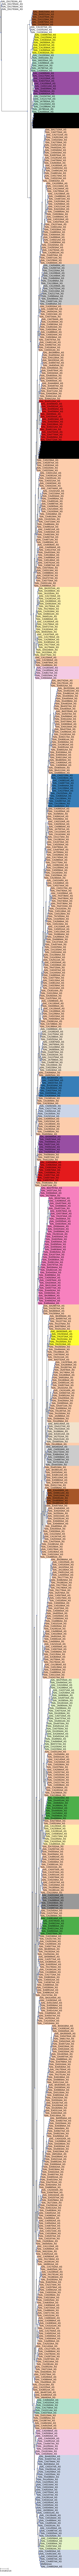

In [76]:
gds = subtype_node.genome_distance_subtype()
for g, ds in gds.items():
    d_st_list = [(d, st) for d, st in ds.items()]
    d_st_list.sort(key=lambda x: x[0])
    d, st = d_st_list[0]
    #print(g, st)
    n = tree&g
    nst = NodeStyle()
    if st is None:
        nst['bgcolor'] = hexcolour(st_to_colour['nan'])
    else:
        nst['bgcolor'] = hexcolour(st_to_colour[st])
    n.set_style(nst)

tree.render("%%inline")

# Join subtype group DF with Enterobase metadata 

In [536]:
dfmd = pd.read_table('SH-1001-enterobase.csv')

In [537]:
dfmd

,Assembly Barcode,Uberstrain,Name,Data Source(Accession No.;Sequencing Platform;Sequencing Library;Insert Size;Experiment;Bases;Average Length;Status),Barcode,Source Niche,Source Type,Source Details,Collection Year,Collection Month,...,Release Date,Status,Coverage,N50,Length,Species,Contig Number(>=200 bp),Low Quality Bases,Version,Assembly Barcode.1
0,SAL_AB5254AA_AS,SAL_PA4104AA,FDA00013034,SRR7084468;ILLUMINA;Paired;500;SRX4014221;;,SAL_PA4104AA,Environment,Soil/Dust,environmental swab,2018.0,3.0,...,2018-04-30,Assembled,871.0,412093.0,4788325.0,Salmonella enterica;100.0%,47.0,8477.0,4.00,SAL_AB5254AA_AS
1,SAL_CB6549AA_AS,SAL_RA4659AA,421576,traces-0lKQnyX;ILLUMINA;Paired;;NA;;,SAL_RA4659AA,Food,Meat,Frozen Chicken Griller,2017.0,9.0,...,2019-01-14,Assembled,814.0,248846.0,5019871.0,Salmonella enterica;96.73%,72.0,77382.0,4.00,SAL_CB6549AA_AS
2,SAL_VA5468AA_AS,SAL_LA4045AA,RM_67,traces-0mfpBto;ILLUMINA;Paired;;NA;2147483647;144,SAL_LA4045AA,Environment,Water,River,2005.0,NaN,...,2018-03-19,Assembled,551.0,694465.0,4878106.0,Salmonella enterica;92.49%,56.0,544.0,3.61,SAL_VA5468AA_AS
3,SAL_AB0737AA_AS,SAL_OA9676AA,sg_8326,SRR6929518;ILLUMINA;Paired;;SRX3875217;;,SAL_OA9676AA,NaN,NaN,NaN,NaN,NaN,...,2018-04-03,Assembled,457.0,753669.0,4752490.0,Salmonella enterica;100.0%,35.0,6399.0,4.00,SAL_AB0737AA_AS
4,SAL_NA6804AA_AS,SAL_HA3275AA,heidelberg8326,traces-0WYLHBa;ILLUMINA;Paired;;NA;2143160800;239,SAL_HA3275AA,NaN,NaN,NaN,2016.0,NaN,...,2017-11-18,Assembled,450.0,753970.0,4754973.0,Salmonella enterica;100.0%,36.0,1830.0,3.51,SAL_NA6804AA_AS
5,SAL_LA7586AA_AS,SAL_GA1805AA,NVSL 4960,SRR1840575;ILLUMINA;Paired;;SRX902609;22183820...,SAL_GA1805AA,Poultry,Avian,Turkey,1987.0,NaN,...,2016-03-05,Assembled,447.0,230989.0,4956140.0,Salmonella enterica;100.0%,58.0,683.0,3.41,SAL_LA7586AA_AS
6,SAL_LA5657AA_AS,SAL_GA3811AA,INSP 94,SRR1060670;ILLUMINA;Paired;250;SRX399270;22232...,SAL_GA3811AA,Human,Human,Homo sapiens; Human,NaN,NaN,...,2015-07-22,Assembled,440.0,231322.0,5050988.0,Salmonella enterica;86.65%,69.0,1096.0,3.41,SAL_LA5657AA_AS
7,SAL_XA3163AA_AS,SAL_MA8245AA,PNUSAS028827,SRR6330613;ILLUMINA;Paired;;SRX3430034;2071928...,SAL_MA8245AA,NaN,NaN,NaN,NaN,NaN,...,2017-11-29,Assembled,434.0,412030.0,4764597.0,Salmonella enterica;100.0%,52.0,1286.0,3.61,SAL_XA3163AA_AS
8,SAL_LA5661AA_AS,SAL_GA3807AA,CDC B2487,SRR1060666;ILLUMINA;Paired;250;SRX399274;20704...,SAL_GA3807AA,Human,Human,Homo sapiens; Human,NaN,NaN,...,2015-07-22,Assembled,408.0,256716.0,5071375.0,Salmonella enterica;98.18%,53.0,1663.0,3.41,SAL_LA5661AA_AS
9,SAL_XA8157AA_AS,SAL_NA1751AA,PNUSAS025468,SRR6373534;ILLUMINA;Paired;;SRX3468381;1839026...,SAL_NA1751AA,NaN,NaN,NaN,NaN,NaN,...,2017-12-13,Assembled,386.0,412096.0,4760319.0,Salmonella enterica;100.0%,49.0,2104.0,3.61,SAL_XA8157AA_AS


In [539]:
df_glst['asm'] = df_glst.index

In [557]:
dfmerge = pd.merge(left=df_glst, right=dfmd, how='left', left_on='asm', right_on='Assembly Barcode.1')

In [558]:
dfmerge.index = dfmerge['asm']

In [559]:
for x in dfmerge.columns:
    print(x)

L0:o
L1:o
L2:o
L3:o
L4:o
L5:o
L6:o
L7:o
asm
Assembly Barcode
Uberstrain
Name
Data Source(Accession No.;Sequencing Platform;Sequencing Library;Insert Size;Experiment;Bases;Average Length;Status)
Barcode
Source Niche
Source Type
Source Details
Collection Year
Collection Month
Collection Day
Collection Time
Continent
Country
Region
District
City
Post Code
Latitude
Longitude
Serovar
Subspecies
Disease
Antigenic Formulas
Phage Type
Lab Contact
Comment
Bio Project ID
Project ID
Sample ID
Secondary Sample ID
Date Entered
Release Date
Status
Coverage
N50
Length
Species
Contig Number(>=200 bp)
Low Quality Bases
Version
Assembly Barcode.1


In [560]:
drop_cols = """
asm
Assembly Barcode
Name
Data Source(Accession No.;Sequencing Platform;Sequencing Library;Insert Size;Experiment;Bases;Average Length;Status)
Barcode
Date Entered
Release Date
Status
Coverage
N50
Length
Species
Contig Number(>=200 bp)
Low Quality Bases
Version
Assembly Barcode.1
Secondary Sample ID
""".strip().split('\n')

In [561]:
dfmerge = dfmerge.drop(columns=['asm'] + drop_cols)

In [562]:
dfmerge.to_csv('SH-1001-subtypes-min-group-size-20-and-enterobase-metadata.csv')

## Filtering of low frequency SNVs is a good idea

This improves performance in finding SNVs specific for different subgroups.

In [8]:
%%timeit
row_sums_df_bin = df_bin.sum(axis=1)

598 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
row_sums_df_bin = np.sum(df_bin.values, axis=1)

31.7 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
row_sums_df_bin = df_bin.sum(axis=1)

In [11]:
row_sums_df_bin_numpy = np.sum(df_bin.values, axis=1)

In [16]:
row_sums_df_bin >= 5

0        False
1        False
2        False
3        False
4         True
5         True
6        False
7         True
8         True
9         True
10       False
11       False
12        True
13        True
14        True
15        True
16        True
17        True
18       False
19       False
20       False
22       False
23        True
24       False
25        True
26        True
27       False
28        True
29       False
30       False
         ...  
37807    False
37808     True
37809    False
37810    False
37811    False
37812    False
37813    False
37814    False
37815    False
37816    False
37817    False
37818     True
37819    False
37820    False
37821    False
37822    False
37823     True
37824    False
37825    False
37826    False
37827     True
37828    False
37829    False
37830    False
37831     True
37832    False
37833     True
37834    False
37835     True
37836    False
Length: 37727, dtype: bool

In [15]:
row_sums_df_bin_numpy >= 5

array([False, False, False, ..., False,  True, False])

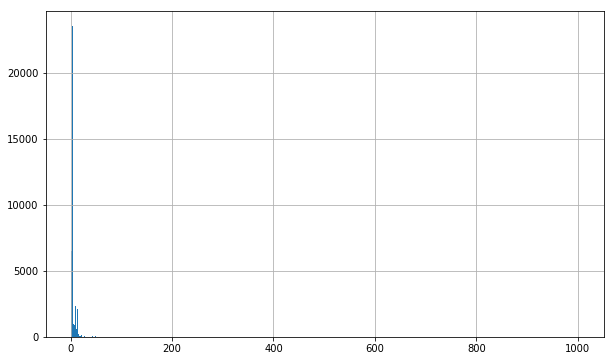

In [630]:
row_sums_df_bin.hist(bins=500)

Frequencies of SNVs observed in $x$ samples from $x= [1 \rightarrow 25] $

In [631]:
for i in range(25):
    print(f'{i+1} {(row_sums_df_bin >= i+1).sum()}')

1 37727
2 31890
3 31220
4 30499
5 7640
6 7510
7 6670
8 6269
9 5787
10 4014
11 3435
12 3342
13 2869
14 770
15 764
16 692
17 587
18 519
19 494
20 473
21 463
22 366
23 364
24 364
25 360


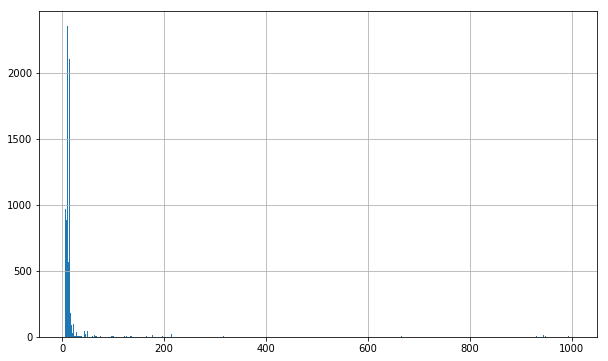

In [632]:
row_sums_df_bin[row_sums_df_bin >= 5].hist(bins=500)

Using the row counts and the minimum group size $N$, we can filter for rows that have SNVs that are present in at least $N$ samples:

In [633]:
df_bin_gte_mgs_5 = df_bin[row_sums_df_bin >= 5]

In [644]:
df_bin.shape

(37727, 1002)

In [634]:
df_bin_gte_mgs_5.shape

(7640, 1002)

Finding SNVs using the full SNV matrix takes a while. There may be ways to speed this up by limiting the amount of copying of data. 

In [644]:
df_bin.shape

(37727, 1002)

In [643]:
%timeit -n 1  snvs_for_subtype(subtype_node, df_bin)

787 ms ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It's about 4-5X faster to find SNVs from a reduced SNV matrix.

In [645]:
df_bin_gte_mgs_5.shape

(7640, 1002)

In [642]:
%timeit -n 1  snvs_for_subtype(subtype_node, df_bin_gte_mgs_5)

165 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
